# Project Exploratory Data Analysis
- ##### Core Dependencies
- ##### DataFrame ingestions
    - ##### Dataset Inventory Engine
    - ##### Dataset Inventory Validation
    - ##### Test Execution – Dataset Inventory
    - ##### Dataset Inventory Execution
    - ##### Dataset Loading Engine
    - ##### Dataset Loading Validation
    - ##### Test Execution - Dataset Loading Engine
    - ##### Dataset Loading Execution
    - ##### Data Preview Engine
    - ##### Data Preview Engine Validation
    - ##### Test Execution - Data Preview Engine
    - ##### Data Preview Engine Execution
    - ##### Dataset Registry Engine
    - ##### Dataset Registry Engine Validation
    - ##### Test Execution - Dataset Registry Engine
    - ##### Dataset Registry Engine Execution
    - ##### Schema Profiling Engine
    - ##### Schema Profiling Engine Validation
    - ##### Test Execution - Schema Profiling Engine
    - ##### Schema Profiling Engine Execution
    - ##### Column-Level Description for Each DataFrame
    - ##### Dataset Shape Inspection Engine
    - ##### Dataset Shape Inspection Engine Validation
    - ##### Test Execution - Dataset Shape Inspection Engine
    - ##### Dataset Shape Inspection Engine Execution
- ##### DataFrame Transformations
    - ##### Mixed Data Type
        - ##### Date Column Profiling Engine
        - ##### Date Column Profiling Engine Validation
        - ##### Test Execution - Date Column Profiling Engine
        - ##### Date Column Profiling Engine Execution
        - ##### Date Type Converter Engine
        - ##### Date Type Converter Engine Validation
        - ##### Test Execution - Date Type Converter Engine
        - ##### Date Type Converter Engine Execution
        - ##### Cost Column Profiling Engine
        - ##### Cost Column Profiling Engine Validation
        - ##### Test Execution - Cost Column Profiling Engine
        - ##### Cost Column Profiling Engine Execution
        - ##### Cost Type Converter Engine
        - ##### Cost Type Converter Engine Validation
        - ##### Test Execution - Cost Type Converter Engine
    - ##### Duplicate Data
        - ##### Cost Type Converter Engine Execution
        - ##### Duplicate Removal Engine
        - ##### Duplicate Removal Engine Validation
        - ##### Test Execution - Duplicate Removal Engine
        - ##### Duplicate Removal Engine Execution
    - ##### Missing Data
        - #####
        - #####
        - #####
        - #####
        - #####
        - #####
        - #####
        - #####

# Core Dependencies

In [87]:
import pandas as pd
import re
from io import StringIO
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.impute import SimpleImputer
from datetime import datetime
from pathlib import Path
import logging
from typing import Dict
import tempfile
import numpy as np

# DataFrame Ingestions

# Dataset Inventory Engine

In [2]:
class DatasetInventory:
    """
    DatasetInventory

    Responsible for:
    - Locating project root
    - Scanning raw data directory
    - Building dataset metadata inventory
    - Exporting results to CSV inside data/inventory
    """

    def __init__(self, data_folder: str = "data/raw"):
        """
        Initialize inventory builder.

        Parameters
        ----------
        data_folder : str
            Relative path to the raw data directory.
        """
        self.logger = self._configure_logger()
        self.base_dir = self._find_project_root()
        self.data_directory = self.base_dir / data_folder

        self._validate_directory()

    # ==========================================================
    # PRIVATE METHODS
    # ==========================================================

    def _configure_logger(self) -> logging.Logger:
        """Configure logging for the class."""
        logger = logging.getLogger("DatasetInventory")

        if not logger.handlers:
            logger.setLevel(logging.INFO)

            handler = logging.StreamHandler()
            formatter = logging.Formatter(
                "%(asctime)s | %(levelname)s | %(message)s"
            )
            handler.setFormatter(formatter)
            logger.addHandler(handler)

        return logger

    def _find_project_root(self) -> Path:
        """
        Automatically locate project root by searching for 'data' folder.
        Works in notebooks and scripts.
        """
        current_path = Path().resolve()

        while not (current_path / "data").exists() and current_path != current_path.parent:
            current_path = current_path.parent

        self.logger.info(f"Project root located at: {current_path}")
        return current_path

    def _validate_directory(self):
        """Ensure raw data directory exists."""
        if not self.data_directory.exists():
            self.logger.error(f"Data directory not found: {self.data_directory}")
            raise FileNotFoundError(
                f"Directory not found: {self.data_directory}"
            )

        self.logger.info(f"Data directory validated: {self.data_directory}")

    # ==========================================================
    # PUBLIC METHODS
    # ==========================================================

    def build_inventory(self) -> pd.DataFrame:
        """
        Scan folder and build dataset inventory.

        Returns
        -------
        pd.DataFrame
            DataFrame containing metadata of datasets.
        """
        allowed_extensions = [".csv", ".xlsx"]

        files = [
            file for file in self.data_directory.iterdir()
            if file.suffix.lower() in allowed_extensions
        ]

        self.logger.info(f"{len(files)} dataset files found.")

        records = []

        for file in files:
            clean_name = file.stem.split(".", 1)[-1]

            records.append({
                "dataset_name": clean_name,
                "file_name": file.name,
                "extension": file.suffix.lower(),
                "full_path": str(file),
                "file_size_kb": round(file.stat().st_size / 1024, 2)
            })

        df_inventory = pd.DataFrame(records)

        self.logger.info("Dataset inventory successfully built.")
        return df_inventory

    def export_to_csv(
        self,
        df: pd.DataFrame,
        output_filename: str = "dataset_inventory.csv"
    ):
        """
        Export inventory DataFrame to CSV inside:

        project_root/data/inventory/

        Parameters
        ----------
        df : pd.DataFrame
            Inventory DataFrame.
        output_filename : str
            Name of the CSV file.
        """

        # Define export folder
        export_folder = self.base_dir / "data" / "files" / "inventory"

        # Create folder automatically if it does not exist
        export_folder.mkdir(parents=True, exist_ok=True)

        export_path = export_folder / output_filename

        df.to_csv(export_path, index=False)

        self.logger.info(f"Inventory exported to: {export_path}")

# Dataset Inventory Validation

In [3]:
def test_inventory_creation():
    inventory = DatasetInventory()
    df = inventory.build_inventory()

    assert isinstance(df, pd.DataFrame), "Output is not a DataFrame"
    assert not df.empty, "Inventory DataFrame is empty"
    assert "dataset_name" in df.columns, "Missing expected column"

    print("All tests passed successfully!")

# Test Execution – Dataset Inventory

In [4]:
test_inventory_creation()

2026-02-20 09:07:43,623 | INFO | Project root located at: C:\Users\User\Desktop\project-exploratory-data-analysis-framework
2026-02-20 09:07:43,629 | INFO | Data directory validated: C:\Users\User\Desktop\project-exploratory-data-analysis-framework\data\raw
2026-02-20 09:07:43,632 | INFO | 7 dataset files found.
2026-02-20 09:07:43,642 | INFO | Dataset inventory successfully built.


All tests passed successfully!


# Dataset Inventory Execution

In [5]:
inventory = DatasetInventory()
df_inventory = inventory.build_inventory()
inventory.export_to_csv(df_inventory)
display(df_inventory)

2026-02-20 09:07:43,674 | INFO | Project root located at: C:\Users\User\Desktop\project-exploratory-data-analysis-framework
2026-02-20 09:07:43,675 | INFO | Data directory validated: C:\Users\User\Desktop\project-exploratory-data-analysis-framework\data\raw
2026-02-20 09:07:43,678 | INFO | 7 dataset files found.
2026-02-20 09:07:43,682 | INFO | Dataset inventory successfully built.
2026-02-20 09:07:43,696 | INFO | Inventory exported to: C:\Users\User\Desktop\project-exploratory-data-analysis-framework\data\files\inventory\dataset_inventory.csv


,dataset_name,file_name,extension,full_path,file_size_kb
0,sample_dataset,01.sample_dataset.csv,.csv,C:\Users\User\Desktop\project-exploratory-data...,97.62
1,sales_dataset,02.sales_dataset.xlsx,.xlsx,C:\Users\User\Desktop\project-exploratory-data...,84.81
2,extra_variable_dataset,03.extra_variable_dataset.xlsx,.xlsx,C:\Users\User\Desktop\project-exploratory-data...,32.95
3,extra_data_dataset,04.extra_data_dataset.xlsx,.xlsx,C:\Users\User\Desktop\project-exploratory-data...,10.46
4,fact_sales_dataset,05.fact_sales_dataset.csv,.csv,C:\Users\User\Desktop\project-exploratory-data...,3505.06
5,dim_customers_dataset,06.dim_customers_dataset.csv,.csv,C:\Users\User\Desktop\project-exploratory-data...,1511.35
6,dim_products_dataset,07.dim_products_dataset.csv,.csv,C:\Users\User\Desktop\project-exploratory-data...,27.10


#  Dataset Loading Engine

In [6]:
class DatasetLoader:
    """
    DatasetLoader

    Responsible for:
    - Loading datasets dynamically from an inventory DataFrame
    - Supporting CSV and XLSX formats
    - Logging loading process
    """

    def __init__(self, inventory_df: pd.DataFrame):
        """
        Initialize DatasetLoader.

        Parameters
        ----------
        inventory_df : pd.DataFrame
            DataFrame containing dataset metadata with columns:
            - dataset_name
            - full_path
            - extension
        """
        self.logger = self._configure_logger()
        self.inventory_df = inventory_df

        self._validate_inventory()

    # ==========================================================
    # PRIVATE METHODS
    # ==========================================================

    def _configure_logger(self) -> logging.Logger:
        """Configure structured logger."""
        logger = logging.getLogger("DatasetLoader")

        if not logger.handlers:
            logger.setLevel(logging.INFO)
            handler = logging.StreamHandler()
            formatter = logging.Formatter(
                "%(asctime)s | %(levelname)s | %(message)s"
            )
            handler.setFormatter(formatter)
            logger.addHandler(handler)

        return logger

    def _validate_inventory(self):
        """Validate required inventory columns."""
        required_columns = {"dataset_name", "full_path", "extension"}

        if not required_columns.issubset(self.inventory_df.columns):
            missing = required_columns - set(self.inventory_df.columns)
            raise ValueError(f"Missing required inventory columns: {missing}")

        self.logger.info("Inventory validation successful.")

    # ==========================================================
    # PUBLIC METHODS
    # ==========================================================

    def load_datasets(self) -> dict:
        """
        Load all datasets from inventory.

        Returns
        -------
        dict
            Dictionary with dataset_name as key
            and pandas DataFrame as value.
        """
        dfs = {}

        for _, row in self.inventory_df.iterrows():
            dataset_name = row["dataset_name"]
            file_path = row["full_path"]
            extension = row["extension"]

            try:
                if extension == ".csv":
                    dfs[dataset_name] = pd.read_csv(file_path)

                elif extension == ".xlsx":
                    dfs[dataset_name] = pd.read_excel(
                        file_path, engine="openpyxl"
                    )

                self.logger.info(f"Loaded dataset: {dataset_name}")

            except Exception as e:
                self.logger.error(
                    f"Error loading {dataset_name}: {e}"
                )

        self.logger.info("All datasets processed.")
        return dfs

# Dataset Loading Validation

In [7]:
def test_dataset_loader():
    loader = DatasetLoader(df_inventory)
    dfs = loader.load_datasets()

    assert isinstance(dfs, dict), "Output is not a dictionary"
    assert len(dfs) > 0, "No datasets were loaded"

    for name, df in dfs.items():
        assert isinstance(df, pd.DataFrame), f"{name} is not a DataFrame"

    print("DatasetLoader test passed successfully!")

# Test Execution - Dataset Loading Engine

In [8]:
test_dataset_loader()

2026-02-20 09:07:43,783 | INFO | Inventory validation successful.
2026-02-20 09:07:43,830 | INFO | Loaded dataset: sample_dataset
2026-02-20 09:07:44,622 | INFO | Loaded dataset: sales_dataset
2026-02-20 09:07:44,754 | INFO | Loaded dataset: extra_variable_dataset
2026-02-20 09:07:44,796 | INFO | Loaded dataset: extra_data_dataset
2026-02-20 09:07:44,937 | INFO | Loaded dataset: fact_sales_dataset
2026-02-20 09:07:45,013 | INFO | Loaded dataset: dim_customers_dataset
2026-02-20 09:07:45,048 | INFO | Loaded dataset: dim_products_dataset
2026-02-20 09:07:45,051 | INFO | All datasets processed.


DatasetLoader test passed successfully!


# Dataset Loading Execution

In [9]:
loader = DatasetLoader(df_inventory)
loader_dfs = loader.load_datasets()

2026-02-20 09:07:45,068 | INFO | Inventory validation successful.
2026-02-20 09:07:45,079 | INFO | Loaded dataset: sample_dataset
2026-02-20 09:07:45,341 | INFO | Loaded dataset: sales_dataset
2026-02-20 09:07:45,449 | INFO | Loaded dataset: extra_variable_dataset
2026-02-20 09:07:45,469 | INFO | Loaded dataset: extra_data_dataset
2026-02-20 09:07:45,579 | INFO | Loaded dataset: fact_sales_dataset
2026-02-20 09:07:45,647 | INFO | Loaded dataset: dim_customers_dataset
2026-02-20 09:07:45,657 | INFO | Loaded dataset: dim_products_dataset
2026-02-20 09:07:45,658 | INFO | All datasets processed.


# Data Preview Engine

In [10]:
class DatasetPreviewer:
    """
    DatasetPreviewer

    Responsible for:
    - Displaying preview rows from loaded datasets
    - Logging preview operations
    """

    def __init__(self, datasets: dict):
        """
        Parameters
        ----------
        datasets : dict
            Dictionary containing dataset_name -> DataFrame
        """
        self.logger = self._configure_logger()
        self.datasets = datasets

    # ==========================================================
    # PRIVATE METHODS
    # ==========================================================

    def _configure_logger(self) -> logging.Logger:
        logger = logging.getLogger("DatasetPreviewer")

        if not logger.handlers:
            logger.setLevel(logging.INFO)
            handler = logging.StreamHandler()
            formatter = logging.Formatter(
                "%(asctime)s | %(levelname)s | %(message)s"
            )
            handler.setFormatter(formatter)
            logger.addHandler(handler)

        return logger

    # ==========================================================
    # PUBLIC METHODS
    # ==========================================================

    def preview_first_row(self):
        """
        Display the first row of each dataset.
        """
        for dataset_name, df in self.datasets.items():

            if not isinstance(df, pd.DataFrame):
                self.logger.warning(f"{dataset_name} is not a DataFrame.")
                continue

            self.logger.info(f"Previewing dataset: {dataset_name}")

            print("\n")
            print(f"First row of dataset: {dataset_name}")
            display(df.head(1))
            print("\n")

# Data Preview Engine Validation

In [11]:
def test_dataset_previewer():
    previewer = DatasetPreviewer(loader_dfs)
    
    assert isinstance(previewer.datasets, dict), "Datasets is not a dictionary"
    assert len(previewer.datasets) > 0, "No datasets available"

    print("DatasetPreviewer test passed successfully!")

# Test Execution - Data Preview Engine

In [12]:
test_dataset_previewer()

DatasetPreviewer test passed successfully!


# Data Preview Engine Execution

In [13]:
previewer = DatasetPreviewer(loader_dfs)
previewer.preview_first_row()

2026-02-20 09:07:45,765 | INFO | Previewing dataset: sample_dataset




First row of dataset: sample_dataset


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,NaN,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,...,17.33,NaN,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189,0


2026-02-20 09:07:45,801 | INFO | Previewing dataset: sales_dataset






First row of dataset: sales_dataset


,country,order_value_EUR,cost,date,category,customer_name,sales_manager,sales_rep,device_type,order_id
0,Sweden,98320.37,77722.25,8/23/2020,Games,Konopelski LLC,Maxie Marrow,Tarrah Castelletti,Tablet,70-0511466


2026-02-20 09:07:45,818 | INFO | Previewing dataset: extra_variable_dataset






First row of dataset: extra_variable_dataset


,order_id,refund
0,70-0511466,43621


2026-02-20 09:07:45,828 | INFO | Previewing dataset: extra_data_dataset






First row of dataset: extra_data_dataset


,country,order_value_EUR,cost,date,category,customer_name,sales_manager,sales_rep,device_type,order_id,refund
0,Sweden,17524.02,14122.61,2020-12-02 00:00:00,Books,Goldner-Dibbert,Maxie Marrow,Madelon Bront,Mobile,70-0511466,7964


2026-02-20 09:07:45,851 | INFO | Previewing dataset: fact_sales_dataset






First row of dataset: fact_sales_dataset


,order_number,product_key,customer_key,order_date,shipping_date,due_date,sales_amount,quantity,price
0,SO54496,282,5400,2013-03-16,2013-03-23,2013-03-28,25,1,25


2026-02-20 09:07:45,869 | INFO | Previewing dataset: dim_customers_dataset






First row of dataset: dim_customers_dataset


,customer_key,customer_id,customer_number,first_name,last_name,country,marital_status,gender,birthdate,create_date
0,1,11000,AW00011000,Jon,Yang,Australia,Married,Male,1971-10-06,2025-10-06


2026-02-20 09:07:45,890 | INFO | Previewing dataset: dim_products_dataset






First row of dataset: dim_products_dataset


,product_key,product_id,product_number,product_name,category_id,category,subcategory,maintenance,cost,product_line,start_date
0,1,210,FR-R92B-58,HL Road Frame - Black- 58,CO_RF,Components,Road Frames,Yes,0,Road,2003-07-01


# Dataset Registry Engine

In [14]:
class DatasetRegistry:
    """
    DatasetRegistry

    Responsible for:
    - Registering loaded DataFrames
    - Creating a catalog DataFrame of dataset names
    - Exporting registry to CSV
    - Logging registry operations
    """

    def __init__(self, datasets: dict):
        """
        Initialize DatasetRegistry.

        Parameters
        ----------
        datasets : dict
            Dictionary containing dataset_name -> DataFrame
        """
        self.logger = self._configure_logger()
        self.datasets = datasets
        self.base_dir = self._find_project_root()

        self._validate_input()

        # 🔥 Caminho de exportação
        self.export_folder = self.base_dir / "data" / "files" / "dataframes"
        self.export_folder.mkdir(parents=True, exist_ok=True)

        self.logger.info(f"Registry export folder set to: {self.export_folder}")

    # ==========================================================
    # PRIVATE METHODS
    # ==========================================================

    def _configure_logger(self) -> logging.Logger:
        logger = logging.getLogger("DatasetRegistry")

        if not logger.handlers:
            logger.setLevel(logging.INFO)
            handler = logging.StreamHandler()
            formatter = logging.Formatter(
                "%(asctime)s | %(levelname)s | %(message)s"
            )
            handler.setFormatter(formatter)
            logger.addHandler(handler)

        return logger

    def _find_project_root(self) -> Path:
        current_path = Path().resolve()

        while not (current_path / "data").exists() and current_path != current_path.parent:
            current_path = current_path.parent

        self.logger.info(f"Project root located at: {current_path}")
        return current_path

    def _validate_input(self):
        if not isinstance(self.datasets, dict):
            raise TypeError("Datasets must be a dictionary.")

        if len(self.datasets) == 0:
            raise ValueError("Datasets dictionary is empty.")

        self.logger.info("Datasets validated successfully.")

    # ==========================================================
    # PUBLIC METHODS
    # ==========================================================

    def build_registry(self) -> pd.DataFrame:
        """
        Create a registry DataFrame listing loaded DataFrames.

        Returns
        -------
        pd.DataFrame
            DataFrame containing dataset names.
        """
        registry_df = pd.DataFrame({
            "dataframe_name": list(self.datasets.keys())
        })

        self.logger.info("Dataset registry successfully created.")
        return registry_df

    def export_to_csv(self, filename: str = "dataset_registry.csv") -> pd.DataFrame:
        """
        Export registry DataFrame to CSV.

        Parameters
        ----------
        filename : str
            Name of the CSV file.

        Returns
        -------
        pd.DataFrame
            Exported registry DataFrame.
        """
        registry_df = self.build_registry()

        export_path = self.export_folder / filename
        registry_df.to_csv(export_path, index=False)

        self.logger.info(f"Dataset registry exported to: {export_path}")

        return registry_df

# Dataset Registry Engine Validation

In [15]:
def test_dataset_registry():
    """
    Unit test for DatasetRegistry.

    Validates:
    - Correct instantiation
    - Output type
    - Expected columns
    - Registry size consistency
    - CSV file creation
    """

    # Arrange (mock datasets)
    mock_datasets = {
        "dataset_a": pd.DataFrame({"col1": [1, 2]}),
        "dataset_b": pd.DataFrame({"col2": [3, 4]})
    }

    registry = DatasetRegistry(mock_datasets)

    # Act
    registry_df = registry.export_to_csv("test_registry.csv")

    # Assert - tipo de retorno
    assert isinstance(registry_df, pd.DataFrame), "Output is not a DataFrame"

    # Assert - coluna esperada
    assert "dataframe_name" in registry_df.columns, "Missing dataframe_name column"

    # Assert - tamanho consistente
    assert len(registry_df) == len(mock_datasets), "Registry size mismatch"

    # Assert - arquivo criado
    expected_file = registry.export_folder / "test_registry.csv"
    assert expected_file.exists(), "CSV file was not created"

    print("DatasetRegistry test passed successfully!")

# Test Execution - Dataset Registry Engine

In [16]:
test_dataset_registry()

2026-02-20 09:07:45,977 | INFO | Project root located at: C:\Users\User\Desktop\project-exploratory-data-analysis-framework
2026-02-20 09:07:45,979 | INFO | Datasets validated successfully.
2026-02-20 09:07:45,982 | INFO | Registry export folder set to: C:\Users\User\Desktop\project-exploratory-data-analysis-framework\data\files\dataframes
2026-02-20 09:07:45,984 | INFO | Dataset registry successfully created.
2026-02-20 09:07:45,989 | INFO | Dataset registry exported to: C:\Users\User\Desktop\project-exploratory-data-analysis-framework\data\files\dataframes\test_registry.csv


DatasetRegistry test passed successfully!


# Dataset Registry Engine Execution

In [17]:
registry = DatasetRegistry(loader_dfs)
registry_df = registry.export_to_csv()

2026-02-20 09:07:46,009 | INFO | Project root located at: C:\Users\User\Desktop\project-exploratory-data-analysis-framework
2026-02-20 09:07:46,011 | INFO | Datasets validated successfully.
2026-02-20 09:07:46,014 | INFO | Registry export folder set to: C:\Users\User\Desktop\project-exploratory-data-analysis-framework\data\files\dataframes
2026-02-20 09:07:46,016 | INFO | Dataset registry successfully created.
2026-02-20 09:07:46,021 | INFO | Dataset registry exported to: C:\Users\User\Desktop\project-exploratory-data-analysis-framework\data\files\dataframes\dataset_registry.csv


# Schema Profiling Engine

In [18]:
class DatasetSchemaProfiler:
    """
    DatasetSchemaProfiler

    Responsible for:
    - Extracting schema (dataset_name + column_name + dtype)
    - Saving schema files inside:
      project_root/data/files/schemas
    """

    def __init__(self, datasets: dict):
        """
        Parameters
        ----------
        datasets : dict
            Dictionary with dataset_name -> DataFrame
        """
        self.logger = self._configure_logger()
        self.datasets = datasets
        self.base_dir = self._find_project_root()

        # Export folder
        self.export_folder = self.base_dir / "data" / "files" / "schemas"
        self.export_folder.mkdir(parents=True, exist_ok=True)

        self.logger.info(f"Export folder set to: {self.export_folder}")

    # ==========================================================
    # PRIVATE METHODS
    # ==========================================================

    def _configure_logger(self) -> logging.Logger:
        logger = logging.getLogger("DatasetSchemaProfiler")

        if not logger.handlers:
            logger.setLevel(logging.INFO)
            handler = logging.StreamHandler()
            formatter = logging.Formatter(
                "%(asctime)s | %(levelname)s | %(message)s"
            )
            handler.setFormatter(formatter)
            logger.addHandler(handler)

        return logger

    def _find_project_root(self) -> Path:
        current_path = Path().resolve()

        while not (current_path / "data").exists() and current_path != current_path.parent:
            current_path = current_path.parent

        self.logger.info(f"Project root located at: {current_path}")
        return current_path

    # ==========================================================
    # PUBLIC METHODS
    # ==========================================================

    def build_schema(self, dataset_name: str, df: pd.DataFrame) -> pd.DataFrame:
        """
        Create schema DataFrame including dataset_name.

        Returns
        -------
        pd.DataFrame
            DataFrame with dataset_name, column_name and data_type.
        """
        schema_df = pd.DataFrame({
            "dataset_name": dataset_name,
            "column_name": df.columns,
            "data_type": df.dtypes.astype(str).values
        })

        return schema_df

    def export_all_schemas(self) -> dict:
        """
        Generate schema CSV for each dataset and save to:
        project_root/data/files/schemas
        """
        schema_results = {}

        for dataset_name, df in self.datasets.items():

            schema_df = self.build_schema(dataset_name, df)

            output_path = self.export_folder / f"{dataset_name}_schema.csv"
            schema_df.to_csv(output_path, index=False)

            self.logger.info(f"Schema exported to: {output_path}")

            schema_results[dataset_name] = schema_df

        self.logger.info("All schemas exported successfully.")
        return schema_results

# Schema Profiling Engine Validation

In [19]:
def test_dataset_schema_profiler():
    """
    Unit test for DatasetSchemaProfiler.

    Validates:
    - Correct return type
    - Expected schema structure
    - Correct number of rows
    - CSV file creation
    """

    # Arrange (mock dataset)
    mock_datasets = {
        "test_dataset": pd.DataFrame({
            "col1": [1, 2],
            "col2": ["a", "b"]
        })
    }

    profiler = DatasetSchemaProfiler(mock_datasets)

    # Act
    schemas = profiler.export_all_schemas()

    # Assert - return type
    assert isinstance(schemas, dict), "Output is not a dictionary"

    # Assert - DataFrame existence
    assert "test_dataset" in schemas, "Dataset key missing"

    schema_df = schemas["test_dataset"]

    assert isinstance(schema_df, pd.DataFrame), "Schema is not a DataFrame"

    # Assert - expected columns
    expected_columns = {"dataset_name", "column_name", "data_type"}
    assert expected_columns.issubset(schema_df.columns), "Missing expected schema columns"

    # Assert - number of rows equals number of columns in dataset
    assert len(schema_df) == len(mock_datasets["test_dataset"].columns), \
        "Schema row count does not match dataset column count"

    # Assert - CSV file creation
    expected_file = profiler.export_folder / "test_dataset_schema.csv"
    assert expected_file.exists(), "Schema CSV file was not created"

    print("DatasetSchemaProfiler test passed successfully!")

# Test Execution - Schema Profiling Engine

In [20]:
test_dataset_schema_profiler()

2026-02-20 09:07:46,088 | INFO | Project root located at: C:\Users\User\Desktop\project-exploratory-data-analysis-framework
2026-02-20 09:07:46,091 | INFO | Export folder set to: C:\Users\User\Desktop\project-exploratory-data-analysis-framework\data\files\schemas
2026-02-20 09:07:46,096 | INFO | Schema exported to: C:\Users\User\Desktop\project-exploratory-data-analysis-framework\data\files\schemas\test_dataset_schema.csv
2026-02-20 09:07:46,098 | INFO | All schemas exported successfully.


DatasetSchemaProfiler test passed successfully!


# Schema Profiling Engine Execution

In [21]:
schema_profiler = DatasetSchemaProfiler(loader_dfs)
schemas = schema_profiler.export_all_schemas()

2026-02-20 09:07:46,140 | INFO | Project root located at: C:\Users\User\Desktop\project-exploratory-data-analysis-framework
2026-02-20 09:07:46,145 | INFO | Export folder set to: C:\Users\User\Desktop\project-exploratory-data-analysis-framework\data\files\schemas
2026-02-20 09:07:46,159 | INFO | Schema exported to: C:\Users\User\Desktop\project-exploratory-data-analysis-framework\data\files\schemas\sample_dataset_schema.csv
2026-02-20 09:07:46,168 | INFO | Schema exported to: C:\Users\User\Desktop\project-exploratory-data-analysis-framework\data\files\schemas\sales_dataset_schema.csv
2026-02-20 09:07:46,174 | INFO | Schema exported to: C:\Users\User\Desktop\project-exploratory-data-analysis-framework\data\files\schemas\extra_variable_dataset_schema.csv
2026-02-20 09:07:46,178 | INFO | Schema exported to: C:\Users\User\Desktop\project-exploratory-data-analysis-framework\data\files\schemas\extra_data_dataset_schema.csv
2026-02-20 09:07:46,183 | INFO | Schema exported to: C:\Users\User\De

# Column-Level Description for Each DataFrame

# Dataset: sample
## Medidas mean (média)

- mean radius: Tamanho médio do núcleo.
- mean texture: Variação da cor (irregularidade visual).
- mean perimeter: Comprimento médio da borda.
- mean area: Área média do núcleo.
- mean smoothness: Regularidade da superfície.
- mean compactness: Grau de irregularidade da forma.
- mean concavity: Nível de “entradas” na borda.
- mean concave points: Quantidade de pontos côncavos.
- mean symmetry: Nível de simetria.
- mean fractal dimension: Complexidade da borda.
## Medidas error (variação)
- Mostram o quanto cada medida varia entre as células.
- radius error: Variação do tamanho.
- texture error: Variação da textura.
- perimeter error: Variação do perímetro.
- area error: Variação da área.
- smoothness error: Variação da suavidade.
- compactness error: Variação da compactação.
- concavity error: Variação da concavidade.
- concave points error: Variação dos pontos côncavos.
- symmetry error: Variação da simetria.
- fractal dimension error: Variação da complexidade.
## Medidas worst (pior valor observado)
- Maior valor encontrado em cada característica.
- worst radius: Maior tamanho.
- worst texture: Maior irregularidade.
- worst perimeter: Maior perímetro.
- worst area: Maior área.
- worst smoothness: Maior irregularidade de superfície.
- worst compactness: Maior irregularidade de forma.
- worst concavity: Maior concavidade.
- worst concave points: Maior número de pontos côncavos.
- worst symmetry: Maior assimetria.
- worst fractal dimension: Maior complexidade da borda.

## target
- 0: Benigno
- 1: Maligno

# Dataset: sales

## Dataset transacional de vendas.

- Coluna: Significado
- country: País do cliente
- order_value_EUR: Valor total do pedido em euros
- cost: Custo da venda (⚠️ está como object, deveria ser float)
- date: Data da venda
- category: Categoria do produto
- customer_name: Nome do cliente
- sales_manager: Gerente responsável
- sales_rep: Representante comercial
- device_type: Dispositivo usado na compra
- order_id: dentificador único do pedido

# Dataset: extra_variable
- Coluna:	Significado
- order_id:	Chave de ligação
- refund:	Valor reembolsado ao cliente
###### Complementa o dataset sales.

# Dataset: extra_data

Este dataset já é uma versão enriquecida do sales.

- Coluna: Significado
- country: País
- order_value_EUR: Valor do pedido
- cost: Custo da venda
- date: Data
- category: Categoria
- customer_name: Cliente
- sales_manager: Gerente
- sales_rep: Representante
- device_type: Dispositivo
- order_id	ID do pedido
- refund:	Reembolso

###### É praticamente o sales já consolidado com extra_variable.

# Dataset: fact_sales

###### Tabela Fato (Modelo Star Schema – Data Warehouse)

Representa fatos de vendas.

- Coluna: Significado
- order_number: Número do pedido
- product_key: Chave estrangeira do produto
- customer_key: Chave estrangeira do cliente
- order_date: Data do pedido
- shipping_date: Data de envio
- due_date: Data prevista de entrega
- sales_amount: Valor total da venda
- quantity: Quantidade vendida
- price: Preço unitário

###### Esta é a tabela central do modelo dimensional.

# Dataset: dim_customers

###### Dimensão Cliente

- Coluna: Significado
- customer_key: Chave substituta (Primary Key)
- customer_id: ID original do sistema
- customer_number: Código do cliente
- first_name: Primeiro nome
- last_name: Sobrenome
- country: País
- marital_status: Estado civil
- gender: Gênero
- birthdate: Data de nascimento
- create_date: Data de cadastro

###### Usado para análises demográficas.

# Dataset: dim_products

###### Dimensão Produto

- Coluna: Significado
- product_key: Chave substituta
- product_id: ID original
- product_number: Código do produto
- product_name: Nome do produto
- category_id: ID da categoria
- category: Categoria do produto
- subcategory: Subcategoria
- maintenance: Tipo de manutenção
- cost: Custo do produto
- product_line: Linha de produto
- start_date: Data de início de comercialização

# Dataset Shape Inspection Engine

In [22]:
class DatasetShapeInspector:
    """
    DatasetShapeInspector

    Responsible for:
    - Inspecting dataset shapes
    - Logging inspection operations
    - Exporting shape report to CSV
    """

    def __init__(self, datasets: dict):
        """
        Parameters
        ----------
        datasets : dict
            Dictionary containing dataset_name -> DataFrame
        """
        self.logger = self._configure_logger()
        self.datasets = datasets
        self.base_dir = self._find_project_root()
        self._validate_input()

        # 🔥 Caminho de exportação
        self.export_folder = self.base_dir / "data" / "files" / "shape"
        self.export_folder.mkdir(parents=True, exist_ok=True)

        self.logger.info(f"Shape export folder set to: {self.export_folder}")

    # ==========================================================
    # PRIVATE METHODS
    # ==========================================================

    def _configure_logger(self) -> logging.Logger:
        logger = logging.getLogger("DatasetShapeInspector")

        if not logger.handlers:
            logger.setLevel(logging.INFO)
            handler = logging.StreamHandler()
            formatter = logging.Formatter(
                "%(asctime)s | %(levelname)s | %(message)s"
            )
            handler.setFormatter(formatter)
            logger.addHandler(handler)

        return logger

    def _find_project_root(self) -> Path:
        current_path = Path().resolve()

        while not (current_path / "data").exists() and current_path != current_path.parent:
            current_path = current_path.parent

        self.logger.info(f"Project root located at: {current_path}")
        return current_path

    def _validate_input(self):
        if not isinstance(self.datasets, dict):
            raise TypeError("Datasets must be a dictionary.")

        if len(self.datasets) == 0:
            raise ValueError("Datasets dictionary is empty.")

        self.logger.info("Datasets validated successfully.")

    # ==========================================================
    # PUBLIC METHODS
    # ==========================================================

    def inspect_and_export_shapes(self) -> pd.DataFrame:
        """
        Inspect dataset shapes and export results to CSV.

        Returns
        -------
        pd.DataFrame
            DataFrame containing dataset_name, rows and columns.
        """
        results = []

        for name, df in self.datasets.items():

            if not isinstance(df, pd.DataFrame):
                self.logger.warning(f"{name} is not a DataFrame. Skipping.")
                continue

            rows, cols = df.shape

            self.logger.info(f"Dataset: {name} | Rows: {rows} | Columns: {cols}")

            results.append({
                "dataset_name": name,
                "rows": rows,
                "columns": cols
            })

        shape_df = pd.DataFrame(results)

        # 🔥 Exportar CSV
        export_path = self.export_folder / "datasets_shape_report.csv"
        shape_df.to_csv(export_path, index=False)

        self.logger.info(f"Shape report exported to: {export_path}")

        return shape_df

# Dataset Shape Inspection Engine Validation

In [23]:
def test_dataset_shape_inspector():
    """
    Unit test for DatasetShapeInspector.

    Validates:
    - Return type
    - Expected columns
    - Correct row count
    - Correct shape values
    - CSV file creation
    """

    # Arrange (mock dataset)
    mock_datasets = {
        "dataset_a": pd.DataFrame({"col1": [1, 2, 3]}),
        "dataset_b": pd.DataFrame({
            "col2": [4, 5],
            "col3": [6, 7]
        })
    }

    inspector = DatasetShapeInspector(mock_datasets)

    # Act
    result_df = inspector.inspect_and_export_shapes()

    # Assert - tipo de retorno
    assert isinstance(result_df, pd.DataFrame), "Output is not a DataFrame"

    # Assert - colunas esperadas
    expected_columns = {"dataset_name", "rows", "columns"}
    assert expected_columns.issubset(result_df.columns), "Missing expected columns"

    # Assert - número de datasets
    assert len(result_df) == len(mock_datasets), "Dataset count mismatch"

    # Assert - valores corretos
    row_a = result_df[result_df["dataset_name"] == "dataset_a"].iloc[0]
    assert row_a["rows"] == 3, "Incorrect row count for dataset_a"
    assert row_a["columns"] == 1, "Incorrect column count for dataset_a"

    # Assert - CSV criado
    expected_file = inspector.export_folder / "datasets_shape_report.csv"
    assert expected_file.exists(), "Shape report CSV was not created"

    print("DatasetShapeInspector test passed successfully!")

# Test Execution - Dataset Shape Inspection Engine

In [24]:
test_dataset_shape_inspector()

2026-02-20 09:07:46,305 | INFO | Project root located at: C:\Users\User\Desktop\project-exploratory-data-analysis-framework
2026-02-20 09:07:46,307 | INFO | Datasets validated successfully.
2026-02-20 09:07:46,308 | INFO | Shape export folder set to: C:\Users\User\Desktop\project-exploratory-data-analysis-framework\data\files\shape
2026-02-20 09:07:46,310 | INFO | Dataset: dataset_a | Rows: 3 | Columns: 1
2026-02-20 09:07:46,312 | INFO | Dataset: dataset_b | Rows: 2 | Columns: 2
2026-02-20 09:07:46,318 | INFO | Shape report exported to: C:\Users\User\Desktop\project-exploratory-data-analysis-framework\data\files\shape\datasets_shape_report.csv


DatasetShapeInspector test passed successfully!


# Dataset Shape Inspection Engine Execution

In [25]:
shape_inspector = DatasetShapeInspector(loader_dfs)
shape_df = shape_inspector.inspect_and_export_shapes()

2026-02-20 09:07:46,347 | INFO | Project root located at: C:\Users\User\Desktop\project-exploratory-data-analysis-framework
2026-02-20 09:07:46,349 | INFO | Datasets validated successfully.
2026-02-20 09:07:46,352 | INFO | Shape export folder set to: C:\Users\User\Desktop\project-exploratory-data-analysis-framework\data\files\shape
2026-02-20 09:07:46,355 | INFO | Dataset: sample_dataset | Rows: 569 | Columns: 31
2026-02-20 09:07:46,356 | INFO | Dataset: sales_dataset | Rows: 1000 | Columns: 10
2026-02-20 09:07:46,359 | INFO | Dataset: extra_variable_dataset | Rows: 1000 | Columns: 2
2026-02-20 09:07:46,361 | INFO | Dataset: extra_data_dataset | Rows: 10 | Columns: 11
2026-02-20 09:07:46,363 | INFO | Dataset: fact_sales_dataset | Rows: 60398 | Columns: 9
2026-02-20 09:07:46,366 | INFO | Dataset: dim_customers_dataset | Rows: 18484 | Columns: 10
2026-02-20 09:07:46,368 | INFO | Dataset: dim_products_dataset | Rows: 295 | Columns: 11
2026-02-20 09:07:46,373 | INFO | Shape report exported

# Dataset Info profiler Engine

In [79]:
class DatasetInfoProfiler:
    """
    DatasetInfoProfiler

    Responsible for:
    - Extracting structured df.info() metadata
    - Exporting dataset structural reports
    """

    def __init__(self, datasets: dict[str, pd.DataFrame]):
        self.logger = self._configure_logger()
        self.datasets = datasets
        self.base_dir = self._find_project_root()

        self.export_folder = self.base_dir / "data" / "files" / "info"
        self.export_folder.mkdir(parents=True, exist_ok=True)

        self._validate_input()

        self.logger.info(f"Info export folder set to: {self.export_folder}")

    # ==========================================================
    # PRIVATE METHODS
    # ==========================================================

    def _configure_logger(self) -> logging.Logger:
        logger = logging.getLogger("DatasetInfoProfiler")

        if not logger.handlers:
            logger.setLevel(logging.INFO)
            handler = logging.StreamHandler()
            formatter = logging.Formatter(
                "%(asctime)s | %(levelname)s | %(message)s"
            )
            handler.setFormatter(formatter)
            logger.addHandler(handler)

        return logger

    def _find_project_root(self) -> Path:
        current_path = Path().resolve()

        while not (current_path / "data").exists() and current_path != current_path.parent:
            current_path = current_path.parent

        self.logger.info(f"Project root located at: {current_path}")
        return current_path

    def _validate_input(self):
        if not isinstance(self.datasets, dict):
            raise TypeError("Datasets must be a dictionary.")

        if len(self.datasets) == 0:
            raise ValueError("Datasets dictionary is empty.")

        self.logger.info("Datasets validated successfully.")

    # ==========================================================
    # BUILD METHODS
    # ==========================================================

    def build_column_info(self, df: pd.DataFrame) -> pd.DataFrame:
        """
        Build column-level structure DataFrame.
        """
        return pd.DataFrame({
            "#": range(len(df.columns)),
            "Column": df.columns,
            "Non-Null Count": df.notnull().sum().values,
            "Dtype": df.dtypes.astype(str).values
        })

    def build_dataset_metadata(self, df: pd.DataFrame) -> pd.DataFrame:
        """
        Build dataset-level metadata DataFrame.
        """

        range_index = (
            f"{df.index.start} to {df.index.stop - 1}"
            if isinstance(df.index, pd.RangeIndex)
            else "Custom Index"
        )

        return pd.DataFrame([{
            "RangeIndex": range_index,
            "Total Rows": df.shape[0],
            "Total Columns": df.shape[1],
            "Dtype Summary": str(df.dtypes.value_counts().to_dict()),
            "Memory Usage (MB)": round(df.memory_usage(deep=True).sum() / (1024 ** 2), 4)
        }])

    # ==========================================================
    # EXPORT METHODS
    # ==========================================================

    def export_all_infos(self) -> dict:
        """
        Export default CSV files:
        - *_columns_info.csv
        - *_metadata_info.csv
        """
        return self._export_with_suffix(suffix="")

    def export_all_infos_with_suffix(self, suffix: str) -> dict:
        """
        Export CSV files adding a suffix at the end of the filename.

        Example:
        dataset_columns_info_v2.csv
        dataset_metadata_info_v2.csv
        """
        if not suffix:
            raise ValueError("Suffix cannot be empty.")

        return self._export_with_suffix(suffix=f"_{suffix}")

    def _export_with_suffix(self, suffix: str) -> dict:
        """
        Internal reusable export logic.
        """
        results = {}

        for dataset_name, df in self.datasets.items():

            if not isinstance(df, pd.DataFrame):
                self.logger.warning(f"{dataset_name} is not a DataFrame. Skipping.")
                continue

            column_info_df = self.build_column_info(df)
            metadata_df = self.build_dataset_metadata(df)

            column_path = self.export_folder / \
                f"{dataset_name}_columns_info{suffix}.csv"

            metadata_path = self.export_folder / \
                f"{dataset_name}_metadata_info{suffix}.csv"

            column_info_df.to_csv(column_path, index=False)
            metadata_df.to_csv(metadata_path, index=False)

            self.logger.info(f"Column info exported: {column_path}")
            self.logger.info(f"Metadata info exported: {metadata_path}")

            results[dataset_name] = {
                "columns_info": column_info_df,
                "metadata_info": metadata_df
            }

        self.logger.info("Dataset info reports exported successfully.")
        return results

# Dataset Info Profiler Engine Validation

In [81]:
def test_dataset_info_profiler():
    """
    Simple unit test for DatasetInfoProfiler.

    Validates:
    - Folder creation
    - CSV export (default)
    - CSV export with suffix
    - Structure of returned DataFrames
    """

    import pandas as pd
    import tempfile
    from pathlib import Path

    # Criando DataFrame de teste
    df = pd.DataFrame({
        "A": [1, 2, None],
        "B": ["x", "y", "z"]
    })

    datasets = {"test_dataset": df}

    # Ambiente isolado
    with tempfile.TemporaryDirectory() as temp_dir:

        temp_path = Path(temp_dir)

        # Criando estrutura mínima para find_project_root funcionar
        (temp_path / "data").mkdir()

        profiler = DatasetInfoProfiler(datasets)

        # Sobrescrevendo base_dir para ambiente temporário
        profiler.base_dir = temp_path
        profiler.export_folder = temp_path / "data" / "files" / "info"
        profiler.export_folder.mkdir(parents=True, exist_ok=True)

        # Teste export padrão
        results = profiler.export_all_infos()

        column_file = profiler.export_folder / "test_dataset_columns_info.csv"
        metadata_file = profiler.export_folder / "test_dataset_metadata_info.csv"

        assert column_file.exists(), "Column info CSV was not created."
        assert metadata_file.exists(), "Metadata CSV was not created."

        assert "columns_info" in results["test_dataset"]
        assert "metadata_info" in results["test_dataset"]

        # Teste export com sufixo
        profiler.export_all_infos_with_suffix("v2")

        column_file_suffix = profiler.export_folder / "test_dataset_columns_info_v2.csv"
        metadata_file_suffix = profiler.export_folder / "test_dataset_metadata_info_v2.csv"

        assert column_file_suffix.exists(), "Column info CSV with suffix not created."
        assert metadata_file_suffix.exists(), "Metadata CSV with suffix not created."

    print("All tests passed successfully!")

# Test Execution - Dataset Info Profiler Engine

In [82]:
test_dataset_info_profiler()

2026-02-20 09:53:01,787 | INFO | Project root located at: C:\Users\User\Desktop\project-exploratory-data-analysis-framework
2026-02-20 09:53:01,787 - INFO - Project root located at: C:\Users\User\Desktop\project-exploratory-data-analysis-framework
2026-02-20 09:53:01,792 | INFO | Datasets validated successfully.
2026-02-20 09:53:01,792 - INFO - Datasets validated successfully.
2026-02-20 09:53:01,794 | INFO | Info export folder set to: C:\Users\User\Desktop\project-exploratory-data-analysis-framework\data\files\info
2026-02-20 09:53:01,794 - INFO - Info export folder set to: C:\Users\User\Desktop\project-exploratory-data-analysis-framework\data\files\info
2026-02-20 09:53:01,808 | INFO | Column info exported: C:\Users\User\AppData\Local\Temp\tmp_3ky0yw2\data\files\info\test_dataset_columns_info.csv
2026-02-20 09:53:01,808 - INFO - Column info exported: C:\Users\User\AppData\Local\Temp\tmp_3ky0yw2\data\files\info\test_dataset_columns_info.csv
2026-02-20 09:53:01,812 | INFO | Metadata in

All tests passed successfully!


# Dataset Info Profiler Engine Execution

In [80]:
info_profiler = DatasetInfoProfiler(loader_dfs)
info_results = info_profiler.export_all_infos()

2026-02-20 09:49:42,059 | INFO | Project root located at: C:\Users\User\Desktop\project-exploratory-data-analysis-framework
2026-02-20 09:49:42,059 - INFO - Project root located at: C:\Users\User\Desktop\project-exploratory-data-analysis-framework
2026-02-20 09:49:42,063 | INFO | Datasets validated successfully.
2026-02-20 09:49:42,063 - INFO - Datasets validated successfully.
2026-02-20 09:49:42,065 | INFO | Info export folder set to: C:\Users\User\Desktop\project-exploratory-data-analysis-framework\data\files\info
2026-02-20 09:49:42,065 - INFO - Info export folder set to: C:\Users\User\Desktop\project-exploratory-data-analysis-framework\data\files\info
2026-02-20 09:49:42,082 | INFO | Column info exported: C:\Users\User\Desktop\project-exploratory-data-analysis-framework\data\files\info\sample_dataset_columns_info.csv
2026-02-20 09:49:42,082 - INFO - Column info exported: C:\Users\User\Desktop\project-exploratory-data-analysis-framework\data\files\info\sample_dataset_columns_info.cs

# DataFrame Transformations

# Mixed Data Type

# Date Column Profiling Engine

In [28]:
class DateColumnProfiler:
    """
    DateColumnProfiler

    Responsible for:
    - Identifying columns containing 'date'
    - Extracting dataset_name, column_name and dtype
    - Exporting results with sequential versioning
    """

    def __init__(self, datasets: dict):
        self.logger = self._configure_logger()
        self.datasets = datasets
        self.base_dir = self._find_project_root()

        self.export_folder = self.base_dir / "data" / "files" / "date_columns"
        self.export_folder.mkdir(parents=True, exist_ok=True)

        self._validate_input()

        self.logger.info(f"Date columns export folder set to: {self.export_folder}")

    # ==========================================================
    # PRIVATE METHODS
    # ==========================================================

    def _configure_logger(self):
        logger = logging.getLogger("DateColumnProfiler")

        if not logger.handlers:
            logger.setLevel(logging.INFO)
            handler = logging.StreamHandler()
            formatter = logging.Formatter(
                "%(asctime)s | %(levelname)s | %(message)s"
            )
            handler.setFormatter(formatter)
            logger.addHandler(handler)

        return logger

    def _find_project_root(self):
        current_path = Path().resolve()

        while not (current_path / "data").exists() and current_path != current_path.parent:
            current_path = current_path.parent

        self.logger.info(f"Project root located at: {current_path}")
        return current_path

    def _validate_input(self):
        if not isinstance(self.datasets, dict):
            raise TypeError("Datasets must be a dictionary.")

        if len(self.datasets) == 0:
            raise ValueError("Datasets dictionary is empty.")

        self.logger.info("Datasets validated successfully.")

    def _get_next_version_filename(self) -> Path:
        """
        Generate next sequential filename like:
        date_columns_report_01.csv
        date_columns_report_02.csv
        """

        existing_files = list(self.export_folder.glob("date_columns_report_*.csv"))

        if not existing_files:
            next_version = 1
        else:
            versions = []
            pattern = re.compile(r"date_columns_report_(\d+)\.csv")

            for file in existing_files:
                match = pattern.search(file.name)
                if match:
                    versions.append(int(match.group(1)))

            next_version = max(versions) + 1 if versions else 1

        filename = f"date_columns_report_{next_version:02d}.csv"
        return self.export_folder / filename

    # ==========================================================
    # PUBLIC METHODS
    # ==========================================================

    def extract_date_columns(self) -> pd.DataFrame:
        results = []

        for dataset_name, df in self.datasets.items():

            if not isinstance(df, pd.DataFrame):
                self.logger.warning(f"{dataset_name} is not a DataFrame. Skipping.")
                continue

            date_columns = [
                col for col in df.columns
                if "date" in col.lower()
            ]

            for col in date_columns:
                results.append({
                    "dataset_name": dataset_name,
                    "column_name": col,
                    "dtype": str(df[col].dtype)
                })

        return pd.DataFrame(results)

    def export_to_csv(self) -> pd.DataFrame:
        """
        Export date column report with automatic sequential versioning.
        """

        result_df = self.extract_date_columns()

        output_path = self._get_next_version_filename()
        result_df.to_csv(output_path, index=False)

        self.logger.info(f"Date columns report exported to: {output_path}")

        return result_df

# Date Column Profiling Engine Validation

In [29]:
def test_date_column_profiler():
    """
    Unit test for DateColumnProfiler.

    Validates:
    - Output type
    - Correct column extraction
    - Case-insensitive filtering
    - Sequential file generation
    - CSV file creation
    """

    import os

    #  Arrange – mock datasets
    mock_datasets = {
        "dataset_a": pd.DataFrame({
            "order_date": ["2024-01-01", "2024-01-02"],
            "amount": [100, 200],
         "shipDate": ["2024-01-03", "2024-01-04"]
        }),
        "dataset_b": pd.DataFrame({
            "user_id": [1, 2],
            "birth_date": ["1990-01-01", "1992-02-02"],
            "name": ["Ana", "João"]
        })
    }

    profiler = DateColumnProfiler(mock_datasets)

    # Act
    result_df = profiler.export_to_csv()

    # Assert – tipo de retorno
    assert isinstance(result_df, pd.DataFrame), "Output is not a DataFrame"

    # Assert – colunas esperadas
    expected_columns = {"dataset_name", "column_name", "dtype"}
    assert expected_columns.issubset(result_df.columns), "Missing expected columns"

    # Assert – colunas detectadas corretamente
    extracted_columns = set(result_df["column_name"])
    expected_detected = {"order_date", "shipDate", "birth_date"}
    assert extracted_columns == expected_detected, "Date column detection failed"

    # Assert – arquivo criado
    generated_files = list(profiler.export_folder.glob("date_columns_report_*.csv"))
    assert len(generated_files) >= 1, "CSV file was not generated"

    # Assert – versionamento sequencial funcionando
    versions = [
        int(file.stem.split("_")[-1])
        for file in generated_files
    ]
    assert max(versions) >= 1, "Sequential versioning failed"

    print("DateColumnProfiler test passed successfully!")

# Test Execution - Date Column Profiling Engine

In [30]:
test_date_column_profiler()

2026-02-20 09:07:46,827 | INFO | Project root located at: C:\Users\User\Desktop\project-exploratory-data-analysis-framework
2026-02-20 09:07:46,830 | INFO | Datasets validated successfully.
2026-02-20 09:07:46,831 | INFO | Date columns export folder set to: C:\Users\User\Desktop\project-exploratory-data-analysis-framework\data\files\date_columns
2026-02-20 09:07:46,840 | INFO | Date columns report exported to: C:\Users\User\Desktop\project-exploratory-data-analysis-framework\data\files\date_columns\date_columns_report_07.csv


DateColumnProfiler test passed successfully!


# Date Column Profiling Engine Execution

In [31]:
date_profiler = DateColumnProfiler(loader_dfs)
date_columns_df = date_profiler.export_to_csv()

2026-02-20 09:07:46,858 | INFO | Project root located at: C:\Users\User\Desktop\project-exploratory-data-analysis-framework
2026-02-20 09:07:46,860 | INFO | Datasets validated successfully.
2026-02-20 09:07:46,864 | INFO | Date columns export folder set to: C:\Users\User\Desktop\project-exploratory-data-analysis-framework\data\files\date_columns
2026-02-20 09:07:46,871 | INFO | Date columns report exported to: C:\Users\User\Desktop\project-exploratory-data-analysis-framework\data\files\date_columns\date_columns_report_08.csv


# Date Type Converter Engine

In [32]:
class DateTypeConverter:
    """
    DateTypeConverter

    Responsible for:
    - Identifying object columns containing 'date'
    - Converting them to datetime64[ns]
    - Returning a new transformed dictionary (immutable input)
    """

    def __init__(self, loader_dfs: dict):
        """
        Parameters
        ----------
        loader_dfs : dict
            Dictionary containing dataset_name -> DataFrame
        """
        self.logger = self._configure_logger()
        self.loader_dfs = loader_dfs
        self._validate_input()

    # ==========================================================
    # PRIVATE METHODS
    # ==========================================================

    def _configure_logger(self):
        logger = logging.getLogger("DateTypeConverter")

        if not logger.handlers:
            logger.setLevel(logging.INFO)
            handler = logging.StreamHandler()
            formatter = logging.Formatter(
                "%(asctime)s | %(levelname)s | %(message)s"
            )
            handler.setFormatter(formatter)
            logger.addHandler(handler)

        return logger

    def _validate_input(self):
        if not isinstance(self.loader_dfs, dict):
            raise TypeError("Input must be a dictionary of DataFrames.")

        if len(self.loader_dfs) == 0:
            raise ValueError("Input dictionary is empty.")

        self.logger.info("Input datasets validated successfully.")

    # ==========================================================
    # PUBLIC METHODS
    # ==========================================================

    def transform(self) -> dict:
        """
        Convert object columns containing 'date'
        to datetime64[ns] in a NEW dictionary.

        Returns
        -------
        dict
            New transformed dictionary.
        """

        # Deep copy to avoid mutating original
        transformed_dfs = {
            name: df.copy(deep=True)
            for name, df in self.loader_dfs.items()
        }

        for dataset_name, df in transformed_dfs.items():

            if not isinstance(df, pd.DataFrame):
                self.logger.warning(f"{dataset_name} is not a DataFrame. Skipping.")
                continue

            for col in df.columns:

                if (
                    "date" in col.lower()
                    and df[col].dtype == "object"
                ):
                    self.logger.info(
                        f"Converting '{col}' in '{dataset_name}' to datetime64[ns]"
                    )

                    df[col] = pd.to_datetime(df[col], errors="coerce")

        self.logger.info("Date conversion completed successfully.")

        return transformed_dfs

# Date Type Converter Engine Validation

In [33]:
def test_date_type_converter():
    """
    Unit test for DateTypeConverter.

    Validates:
    - Output is a dictionary
    - Original dictionary is not mutated
    - Only object columns containing 'date' are converted
    - Converted dtype is datetime64[ns]
    - Invalid dates are coerced to NaT
    """

    # Arrange – mock datasets
    original_dfs = {
        "dataset_a": pd.DataFrame({
            "order_date": ["2024-01-01", "invalid_date"],  # should convert
            "shipDate": ["2024-02-01", "2024-02-02"],      # should convert
            "created_date": pd.to_datetime(["2023-01-01", "2023-01-02"]),  # already datetime
            "price": ["100", "200"]  # should NOT convert
        })
    }

    converter = DateTypeConverter(original_dfs)

    # Act
    transformed_dfs = converter.transform()

    # Assert – tipo de retorno
    assert isinstance(transformed_dfs, dict), "Output is not a dictionary"

    # Assert – original não foi alterado
    assert original_dfs["dataset_a"]["order_date"].dtype == object, \
        "Original dictionary was mutated"

    # Assert – conversão correta
    transformed_df = transformed_dfs["dataset_a"]

    assert pd.api.types.is_datetime64_any_dtype(transformed_df["order_date"]), \
        "order_date was not converted to datetime"

    assert pd.api.types.is_datetime64_any_dtype(transformed_df["shipDate"]), \
        "shipDate was not converted to datetime"

    # Assert – invalid date virou NaT
    assert pd.isna(transformed_df["order_date"].iloc[1]), \
        "Invalid date was not coerced to NaT"

    # Assert – coluna já datetime permanece datetime
    assert pd.api.types.is_datetime64_any_dtype(transformed_df["created_date"]), \
        "created_date should remain datetime"

    # Assert – coluna sem 'date' não foi alterada
    assert transformed_df["price"].dtype == object, \
        "Non-date column was incorrectly converted"

    print("DateTypeConverter test passed successfully!")

# Test Execution - Date Type Converter Engine

In [34]:
test_date_type_converter()

2026-02-20 09:07:46,971 | INFO | Input datasets validated successfully.
2026-02-20 09:07:46,974 | INFO | Converting 'order_date' in 'dataset_a' to datetime64[ns]
2026-02-20 09:07:46,979 | INFO | Converting 'shipDate' in 'dataset_a' to datetime64[ns]
2026-02-20 09:07:46,984 | INFO | Date conversion completed successfully.


DateTypeConverter test passed successfully!


# Date Type Converter Engine Execution

In [35]:
converter = DateTypeConverter(loader_dfs)
transformed_dfs = converter.transform()

2026-02-20 09:07:47,003 | INFO | Input datasets validated successfully.
2026-02-20 09:07:47,014 | INFO | Converting 'date' in 'sales_dataset' to datetime64[ns]
2026-02-20 09:07:47,023 | INFO | Converting 'date' in 'extra_data_dataset' to datetime64[ns]
2026-02-20 09:07:47,027 | INFO | Converting 'order_date' in 'fact_sales_dataset' to datetime64[ns]
2026-02-20 09:07:47,047 | INFO | Converting 'shipping_date' in 'fact_sales_dataset' to datetime64[ns]
2026-02-20 09:07:47,069 | INFO | Converting 'due_date' in 'fact_sales_dataset' to datetime64[ns]
2026-02-20 09:07:47,090 | INFO | Converting 'birthdate' in 'dim_customers_dataset' to datetime64[ns]
2026-02-20 09:07:47,115 | INFO | Converting 'create_date' in 'dim_customers_dataset' to datetime64[ns]
2026-02-20 09:07:47,132 | INFO | Converting 'start_date' in 'dim_products_dataset' to datetime64[ns]
2026-02-20 09:07:47,140 | INFO | Date conversion completed successfully.


# Date Column Profiling Engine Execution

In [36]:
date_profiler = DateColumnProfiler(transformed_dfs)
date_columns_df = date_profiler.export_to_csv()

2026-02-20 09:07:47,168 | INFO | Project root located at: C:\Users\User\Desktop\project-exploratory-data-analysis-framework
2026-02-20 09:07:47,170 | INFO | Datasets validated successfully.
2026-02-20 09:07:47,172 | INFO | Date columns export folder set to: C:\Users\User\Desktop\project-exploratory-data-analysis-framework\data\files\date_columns
2026-02-20 09:07:47,181 | INFO | Date columns report exported to: C:\Users\User\Desktop\project-exploratory-data-analysis-framework\data\files\date_columns\date_columns_report_09.csv


# Cost Column Profiling Engine

In [37]:
class CostColumnProfiler:
    """
    CostColumnProfiler

    Responsible for:
    - Identifying columns containing 'cost'
    - Extracting dataset_name, column_name and dtype
    - Exporting results with sequential versioning
    """

    def __init__(self, datasets: dict):
        self.logger = self._configure_logger()
        self.datasets = datasets
        self.base_dir = self._find_project_root()

        # Nova pasta
        self.export_folder = self.base_dir / "data" / "files" / "cost_columns"
        self.export_folder.mkdir(parents=True, exist_ok=True)

        self._validate_input()

        self.logger.info(f"Cost columns export folder set to: {self.export_folder}")

    # ==========================================================
    # PRIVATE METHODS
    # ==========================================================

    def _configure_logger(self):
        logger = logging.getLogger("CostColumnProfiler")

        if not logger.handlers:
            logger.setLevel(logging.INFO)
            handler = logging.StreamHandler()
            formatter = logging.Formatter(
                "%(asctime)s | %(levelname)s | %(message)s"
            )
            handler.setFormatter(formatter)
            logger.addHandler(handler)

        return logger

    def _find_project_root(self):
        current_path = Path().resolve()

        while not (current_path / "data").exists() and current_path != current_path.parent:
            current_path = current_path.parent

        self.logger.info(f"Project root located at: {current_path}")
        return current_path

    def _validate_input(self):
        if not isinstance(self.datasets, dict):
            raise TypeError("Datasets must be a dictionary.")

        if len(self.datasets) == 0:
            raise ValueError("Datasets dictionary is empty.")

        self.logger.info("Datasets validated successfully.")

    def _get_next_version_filename(self) -> Path:
        """
        Generate next sequential filename like:
        cost_columns_report_01.csv
        cost_columns_report_02.csv
        """

        existing_files = list(self.export_folder.glob("cost_columns_report_*.csv"))

        if not existing_files:
            next_version = 1
        else:
            versions = []
            pattern = re.compile(r"cost_columns_report_(\d+)\.csv")

            for file in existing_files:
                match = pattern.search(file.name)
                if match:
                    versions.append(int(match.group(1)))

            next_version = max(versions) + 1 if versions else 1

        filename = f"cost_columns_report_{next_version:02d}.csv"
        return self.export_folder / filename

    # ==========================================================
    # PUBLIC METHODS
    # ==========================================================

    def extract_cost_columns(self) -> pd.DataFrame:
        """
        Extract columns containing 'cost' in their name (case-insensitive).
        """
        results = []

        for dataset_name, df in self.datasets.items():

            if not isinstance(df, pd.DataFrame):
                self.logger.warning(f"{dataset_name} is not a DataFrame. Skipping.")
                continue

            cost_columns = [
                col for col in df.columns
                if "cost" in col.lower()
            ]

            for col in cost_columns:
                results.append({
                    "dataset_name": dataset_name,
                    "column_name": col,
                    "dtype": str(df[col].dtype)
                })

        return pd.DataFrame(results)

    def export_to_csv(self) -> pd.DataFrame:
        """
        Export cost column report with automatic sequential versioning.
        """

        result_df = self.extract_cost_columns()

        output_path = self._get_next_version_filename()
        result_df.to_csv(output_path, index=False)

        self.logger.info(f"Cost columns report exported to: {output_path}")

        return result_df

# Cost Column Profiling Engine Validation

In [38]:
def test_cost_column_profiler():
    """
    Unit test for CostColumnProfiler.

    Validates:
    - Output type
    - Correct cost column detection
    - Case-insensitive filtering
    - Sequential file creation
    """

    import pandas as pd

    # 🔹 Arrange – mock datasets
    mock_datasets = {
        "dataset_a": pd.DataFrame({
            "product_cost": [10, 20],
            "Price": [30, 40],
            "ShippingCost": [5.0, 7.5]
        }),
        "dataset_b": pd.DataFrame({
            "total_COST": ["100", "200"],
            "quantity": [1, 2]
        })
    }

    profiler = CostColumnProfiler(mock_datasets)

    # Act
    result_df = profiler.export_to_csv()

    # Assert – tipo de retorno
    assert isinstance(result_df, pd.DataFrame), "Output is not a DataFrame"

    # Assert – colunas esperadas
    expected_columns = {"dataset_name", "column_name", "dtype"}
    assert expected_columns.issubset(result_df.columns), "Missing expected columns"

    # Assert – colunas detectadas corretamente
    detected_columns = set(result_df["column_name"])
    expected_detected = {"product_cost", "ShippingCost", "total_COST"}
    assert detected_columns == expected_detected, "Cost column detection failed"

    # Assert – arquivo criado
    generated_files = list(profiler.export_folder.glob("cost_columns_report_*.csv"))
    assert len(generated_files) >= 1, "CSV file was not generated"

    # Assert – versionamento sequencial
    versions = [
        int(file.stem.split("_")[-1])
        for file in generated_files
    ]
    assert max(versions) >= 1, "Sequential versioning failed"

    print("CostColumnProfiler test passed successfully!")

# Test Execution - Cost Column Profiling Engine

In [39]:
test_cost_column_profiler()

2026-02-20 09:07:47,279 | INFO | Project root located at: C:\Users\User\Desktop\project-exploratory-data-analysis-framework
2026-02-20 09:07:47,282 | INFO | Datasets validated successfully.
2026-02-20 09:07:47,284 | INFO | Cost columns export folder set to: C:\Users\User\Desktop\project-exploratory-data-analysis-framework\data\files\cost_columns
2026-02-20 09:07:47,292 | INFO | Cost columns report exported to: C:\Users\User\Desktop\project-exploratory-data-analysis-framework\data\files\cost_columns\cost_columns_report_09.csv


CostColumnProfiler test passed successfully!


# Cost Column Profiling Engine Execution

In [40]:
cost_profiler = CostColumnProfiler(transformed_dfs)
cost_df = cost_profiler.export_to_csv()

2026-02-20 09:07:47,317 | INFO | Project root located at: C:\Users\User\Desktop\project-exploratory-data-analysis-framework
2026-02-20 09:07:47,320 | INFO | Datasets validated successfully.
2026-02-20 09:07:47,322 | INFO | Cost columns export folder set to: C:\Users\User\Desktop\project-exploratory-data-analysis-framework\data\files\cost_columns
2026-02-20 09:07:47,329 | INFO | Cost columns report exported to: C:\Users\User\Desktop\project-exploratory-data-analysis-framework\data\files\cost_columns\cost_columns_report_10.csv


# Cost Type Converter Engine

In [41]:
class CostTypeConverter:
    """
    CostTypeConverter

    Responsible for:
    - Identifying non-numeric columns containing 'cost'
    - Converting them safely to float
    - Returning a new transformed dictionary (no mutation)
    """

    def __init__(self, transformed_dfs: dict):
        """
        Parameters
        ----------
        transformed_dfs : dict
            Dictionary containing dataset_name -> DataFrame
        """
        self.logger = self._configure_logger()
        self.transformed_dfs = transformed_dfs
        self._validate_input()

    # ==========================================================
    # PRIVATE METHODS
    # ==========================================================

    def _configure_logger(self):
        logger = logging.getLogger("CostTypeConverter")

        if not logger.handlers:
            logger.setLevel(logging.INFO)
            handler = logging.StreamHandler()
            formatter = logging.Formatter(
                "%(asctime)s | %(levelname)s | %(message)s"
            )
            handler.setFormatter(formatter)
            logger.addHandler(handler)

        return logger

    def _validate_input(self):
        if not isinstance(self.transformed_dfs, dict):
            raise TypeError("Input must be a dictionary of DataFrames.")

        if len(self.transformed_dfs) == 0:
            raise ValueError("Input dictionary is empty.")

        self.logger.info("Input datasets validated successfully.")

    # ==========================================================
    # PUBLIC METHODS
    # ==========================================================

    def transform(self) -> dict:
        """
        Convert non-numeric 'cost' columns to float.

        Returns
        -------
        dict
            New dictionary with transformed DataFrames.
        """

        # Deep copy to avoid mutating original
        new_dfs = {
            name: df.copy(deep=True)
            for name, df in self.transformed_dfs.items()
        }

        for dataset_name, df in new_dfs.items():

            if not isinstance(df, pd.DataFrame):
                self.logger.warning(f"{dataset_name} is not a DataFrame. Skipping.")
                continue

            for col in df.columns:

                if "cost" in col.lower():

                    if not pd.api.types.is_numeric_dtype(df[col]):

                        self.logger.info(
                            f"Converting '{col}' in '{dataset_name}' to float"
                        )

                        df[col] = pd.to_numeric(
                            df[col],
                            errors="coerce"
                        ).astype(float)

        self.logger.info("Cost type conversion completed successfully.")

        return new_dfs

# Cost Type Converter Engine Validation

In [42]:
def test_cost_type_converter():
    """
    Unit test for CostTypeConverter.

    Validates:
    - Output is a dictionary
    - Original dictionary is not mutated
    - Only non-numeric 'cost' columns are converted
    - Converted dtype is float
    """

    # Arrange – mock dataset
    original_dfs = {
        "dataset_a": pd.DataFrame({
            "product_cost": ["100", "200"],      # should convert
            "shippingCost": ["5.5", "7.5"],      # should convert
            "already_cost": [10.0, 20.0],        # already numeric
            "price": ["300", "400"]              # should NOT convert
        })
    }

    converter = CostTypeConverter(original_dfs)

    # Act
    converted_dfs = converter.transform()

    # Assert – tipo de retorno
    assert isinstance(converted_dfs, dict), "Output is not a dictionary"

    # Assert – original não foi alterado
    assert original_dfs["dataset_a"]["product_cost"].dtype == object, \
        "Original dictionary was mutated"

    # Assert – colunas convertidas
    converted_df = converted_dfs["dataset_a"]

    assert pd.api.types.is_float_dtype(converted_df["product_cost"]), \
        "product_cost was not converted to float"

    assert pd.api.types.is_float_dtype(converted_df["shippingCost"]), \
        "shippingCost was not converted to float"

    # Assert – coluna já numérica permanece float
    assert pd.api.types.is_float_dtype(converted_df["already_cost"]), \
        "already_cost should remain float"

    # Assert – coluna sem 'cost' não foi alterada
    assert converted_df["price"].dtype == object, \
        "Non-cost column was incorrectly converted"

    print("CostTypeConverter test passed successfully!")

# Test Execution - Cost Type Converter Engine

In [43]:
test_cost_type_converter()

2026-02-20 09:07:47,410 | INFO | Input datasets validated successfully.
2026-02-20 09:07:47,412 | INFO | Converting 'product_cost' in 'dataset_a' to float
2026-02-20 09:07:47,416 | INFO | Converting 'shippingCost' in 'dataset_a' to float
2026-02-20 09:07:47,419 | INFO | Cost type conversion completed successfully.


CostTypeConverter test passed successfully!


# Cost Type Converter Engine Execution

In [44]:
converter = CostTypeConverter(transformed_dfs)
converted_dfs = converter.transform()

2026-02-20 09:07:47,438 | INFO | Input datasets validated successfully.
2026-02-20 09:07:47,455 | INFO | Converting 'cost' in 'sales_dataset' to float
2026-02-20 09:07:47,460 | INFO | Cost type conversion completed successfully.


# Cost Column Profiling Engine Execution

In [45]:
cost_profiler = CostColumnProfiler(converted_dfs)
cost_df = cost_profiler.export_to_csv()

2026-02-20 09:07:47,495 | INFO | Project root located at: C:\Users\User\Desktop\project-exploratory-data-analysis-framework
2026-02-20 09:07:47,499 | INFO | Datasets validated successfully.
2026-02-20 09:07:47,501 | INFO | Cost columns export folder set to: C:\Users\User\Desktop\project-exploratory-data-analysis-framework\data\files\cost_columns
2026-02-20 09:07:47,510 | INFO | Cost columns report exported to: C:\Users\User\Desktop\project-exploratory-data-analysis-framework\data\files\cost_columns\cost_columns_report_11.csv


# Duplicated Data

# Duplicate Removal Engine

In [46]:
class DuplicateRemover:
    """
    DuplicateRemover

    Responsible for:
    - Removing duplicated rows from each dataset
    - Preserving original datasets (no mutation)
    - Logging duplicate removal operations
    - Returning a new cleaned dictionary
    """

    def __init__(self, datasets: dict):
        """
        Parameters
        ----------
        datasets : dict
            Dictionary containing dataset_name -> DataFrame
        """
        self.logger = self._configure_logger()
        self.datasets = datasets
        self._validate_input()

    # ==========================================================
    # PRIVATE METHODS
    # ==========================================================

    def _configure_logger(self) -> logging.Logger:
        """
        Configure structured logger.
        """
        logger = logging.getLogger("DuplicateRemover")

        if not logger.handlers:
            logger.setLevel(logging.INFO)
            handler = logging.StreamHandler()
            formatter = logging.Formatter(
                "%(asctime)s | %(levelname)s | %(message)s"
            )
            handler.setFormatter(formatter)
            logger.addHandler(handler)

        return logger

    def _validate_input(self):
        """
        Validate input datasets.
        """
        if not isinstance(self.datasets, dict):
            raise TypeError("Input must be a dictionary of DataFrames.")

        if len(self.datasets) == 0:
            raise ValueError("Input dictionary is empty.")

        self.logger.info("Datasets validated successfully.")

    # ==========================================================
    # PUBLIC METHODS
    # ==========================================================

    def transform(self) -> dict:
        """
        Remove duplicated rows from all datasets.

        Returns
        -------
        dict
            New dictionary with duplicates removed.
        """

        # Create new dictionary to avoid mutating original
        cleaned_datasets = {}

        for dataset_name, df in self.datasets.items():

            if not isinstance(df, pd.DataFrame):
                self.logger.warning(
                    f"{dataset_name} is not a DataFrame. Skipping."
                )
                continue

            # Store original row count
            original_rows = df.shape[0]

            # Remove duplicates
            df_no_duplicates = df.drop_duplicates().copy()

            # Calculate removed rows
            new_rows = df_no_duplicates.shape[0]
            removed_rows = original_rows - new_rows

            self.logger.info(
                f"{dataset_name} | "
                f"Original Rows: {original_rows} | "
                f"Removed: {removed_rows} | "
                f"Final Rows: {new_rows}"
            )

            cleaned_datasets[dataset_name] = df_no_duplicates

        self.logger.info("Duplicate removal process completed successfully.")

        return cleaned_datasets

# Duplicate Removal Engine Validation

In [47]:
def test_duplicate_remover():
    """
    Unit test for DuplicateRemover.

    Validates:
    - Output is a dictionary
    - Original dictionary is not mutated
    - Duplicates are removed correctly
    - Non-DataFrame entries are skipped safely
    """

    # Arrange – mock datasets
    original_datasets = {
        "dataset_a": pd.DataFrame({
            "id": [1, 1, 2, 3],
            "value": ["A", "A", "B", "C"]
        }),
        "dataset_b": pd.DataFrame({
            "id": [10, 20, 20],
            "amount": [100, 200, 200]
        }),
        "invalid_entry": "not_a_dataframe"
    }

    remover = DuplicateRemover(original_datasets)

    # Act
    cleaned_datasets = remover.transform()

    # Assert – tipo de retorno
    assert isinstance(cleaned_datasets, dict), "Output is not a dictionary"

    # Assert – original não foi alterado
    assert original_datasets["dataset_a"].shape[0] == 4, \
        "Original dataset was mutated"

    # Assert – duplicatas removidas corretamente
    assert cleaned_datasets["dataset_a"].shape[0] == 3, \
        "Duplicates were not removed correctly in dataset_a"

    assert cleaned_datasets["dataset_b"].shape[0] == 2, \
        "Duplicates were not removed correctly in dataset_b"

    # 🔹 Assert – invalid entry não foi incluído
    assert "invalid_entry" not in cleaned_datasets, \
        "Non-DataFrame entry should not be included"

    print("DuplicateRemover test passed successfully!")

# Test Execution - Duplicate Removal Engine

In [48]:
test_duplicate_remover()

2026-02-20 09:07:47,590 | INFO | Datasets validated successfully.
2026-02-20 09:07:47,602 | INFO | dataset_a | Original Rows: 4 | Removed: 1 | Final Rows: 3
2026-02-20 09:07:47,607 | INFO | dataset_b | Original Rows: 3 | Removed: 1 | Final Rows: 2
2026-02-20 09:07:47,609 | WARNING | invalid_entry is not a DataFrame. Skipping.
2026-02-20 09:07:47,611 | INFO | Duplicate removal process completed successfully.


DuplicateRemover test passed successfully!


# Duplicate Removal Engine Execution

In [49]:
remover = DuplicateRemover(converted_dfs)
clean_dfs = remover.transform()

2026-02-20 09:07:47,638 | INFO | Datasets validated successfully.
2026-02-20 09:07:47,655 | INFO | sample_dataset | Original Rows: 569 | Removed: 0 | Final Rows: 569
2026-02-20 09:07:47,664 | INFO | sales_dataset | Original Rows: 1000 | Removed: 0 | Final Rows: 1000
2026-02-20 09:07:47,670 | INFO | extra_variable_dataset | Original Rows: 1000 | Removed: 0 | Final Rows: 1000
2026-02-20 09:07:47,679 | INFO | extra_data_dataset | Original Rows: 10 | Removed: 0 | Final Rows: 10
2026-02-20 09:07:47,745 | INFO | fact_sales_dataset | Original Rows: 60398 | Removed: 0 | Final Rows: 60398
2026-02-20 09:07:47,775 | INFO | dim_customers_dataset | Original Rows: 18484 | Removed: 0 | Final Rows: 18484
2026-02-20 09:07:47,780 | INFO | dim_products_dataset | Original Rows: 295 | Removed: 0 | Final Rows: 295
2026-02-20 09:07:47,781 | INFO | Duplicate removal process completed successfully.


# MISSING DATA

# Missing Values Analyzer Engine

In [116]:
"""
missing_analyzer.py

Module responsible for:
- Calculating missing value ratio per column
- Creating output directory structure if necessary
- Exporting missing value reports to CSV
- Supporting optional filename suffix
- Logging dataset analysis operations
"""

import logging
import pandas as pd
from pathlib import Path


class MissingValueAnalyzer:
    """
    MissingValueAnalyzer

    Responsible for:
    - Calculating missing value ratios for multiple datasets
    - Creating directory structure if it does not exist
    - Exporting results to individual CSV files
    - Supporting export with optional suffix
    """

    def __init__(self, datasets: dict[str, pd.DataFrame]):

        self.datasets = datasets
        self.project_root = Path().resolve().parent
        self.output_path = self.project_root / "data" / "files" / "missing_data"

        self._configure_logging()
        self._create_output_directory()
        self._validate_input()

    # ==========================================================
    # PRIVATE METHODS
    # ==========================================================

    def _configure_logging(self) -> None:
        logging.basicConfig(
            level=logging.INFO,
            format="%(asctime)s | %(levelname)s | %(message)s"
        )

    def _create_output_directory(self) -> None:
        if not self.output_path.exists():
            self.output_path.mkdir(parents=True, exist_ok=True)
            logging.info(f"Directory created: {self.output_path}")
        else:
            logging.info(f"Directory already exists: {self.output_path}")

    def _validate_input(self) -> None:
        if not isinstance(self.datasets, dict):
            raise TypeError("Datasets must be a dictionary.")
        if len(self.datasets) == 0:
            raise ValueError("Datasets dictionary is empty.")

        logging.info("Datasets validated successfully.")

    def _export_with_suffix(self, suffix: str) -> None:
        """
        Internal reusable export logic.
        """

        for name, df in self.datasets.items():

            logging.info(f"Analyzing dataset: {name}")

            report_df = self.calculate_missing_ratio(df)

            filename = f"missing_report_{name}{suffix}.csv"
            filepath = self.output_path / filename

            report_df.to_csv(filepath, index=False)

            logging.info(f"Report exported successfully: {filepath}")

    # ==========================================================
    # PUBLIC METHODS
    # ==========================================================

    def calculate_missing_ratio(self, df: pd.DataFrame) -> pd.DataFrame:
        """
        Calculate missing value ratio per column.
        """

        if df.empty:
            logging.warning("Received empty DataFrame.")
            return pd.DataFrame(columns=["column", "missing_ratio"])

        missing_ratio = (df.isna().sum() / df.shape[0]).sort_values()

        result_df = missing_ratio.reset_index()
        result_df.columns = ["column", "missing_ratio"]

        return result_df

    def analyze_and_export(self) -> None:
        """
        Export default CSV files:
        - missing_report_<dataset>.csv
        """
        self._export_with_suffix(suffix="")

    def analyze_and_export_with_suffix(self, suffix: str) -> None:
        """
        Export CSV files adding a suffix at the end of filename.

        Example:
        missing_report_sales_v2.csv
        """
        if not suffix:
            raise ValueError("Suffix cannot be empty.")

        self._export_with_suffix(suffix=f"_{suffix}")

# Missing Values Analyzer Engine Validation

In [117]:
def test_missing_value_analyzer():
    """
    Simple unit test for MissingValueAnalyzer.

    Validates:
    - Directory creation
    - Default CSV export
    - Export with suffix
    - Structure of exported CSV
    """

    import pandas as pd
    import tempfile
    from pathlib import Path

    # Criando DataFrame de teste
    df = pd.DataFrame({
        "A": [1, None, 3],
        "B": [None, None, 3]
    })

    datasets = {"test_dataset": df}

    # Ambiente isolado
    with tempfile.TemporaryDirectory() as temp_dir:

        temp_path = Path(temp_dir)

        # Criando estrutura mínima
        (temp_path / "data").mkdir()

        analyzer = MissingValueAnalyzer(datasets)

        # Sobrescrevendo caminhos para não afetar projeto real
        analyzer.project_root = temp_path
        analyzer.output_path = temp_path / "data" / "files" / "missing_data"
        analyzer.output_path.mkdir(parents=True, exist_ok=True)

        # Teste export padrão
        analyzer.analyze_and_export()

        default_file = analyzer.output_path / "missing_report_test_dataset.csv"
        assert default_file.exists(), "Default CSV was not created."

        exported_df = pd.read_csv(default_file)
        assert "column" in exported_df.columns
        assert "missing_ratio" in exported_df.columns

        # Teste export com sufixo
        analyzer.analyze_and_export_with_suffix("v2")

        suffix_file = analyzer.output_path / "missing_report_test_dataset_v2.csv"
        assert suffix_file.exists(), "Suffix CSV was not created."

    print("All tests passed successfully!")

# Test Execution - Missing Values Analyzer Engine

In [118]:
test_missing_value_analyzer()

2026-02-20 10:30:05,244 - INFO - Directory already exists: C:\Users\User\Desktop\project-exploratory-data-analysis-framework\data\files\missing_data
2026-02-20 10:30:05,247 - INFO - Datasets validated successfully.
2026-02-20 10:30:05,250 - INFO - Analyzing dataset: test_dataset
2026-02-20 10:30:05,256 - INFO - Report exported successfully: C:\Users\User\AppData\Local\Temp\tmp253qabvh\data\files\missing_data\missing_report_test_dataset.csv
2026-02-20 10:30:05,284 - INFO - Analyzing dataset: test_dataset
2026-02-20 10:30:05,290 - INFO - Report exported successfully: C:\Users\User\AppData\Local\Temp\tmp253qabvh\data\files\missing_data\missing_report_test_dataset_v2.csv


All tests passed successfully!


# Missing Values Analyzer Engine Execution

In [119]:
analyzer = MissingValueAnalyzer(clean_dfs)
analyzer.analyze_and_export()

2026-02-20 10:30:08,980 - INFO - Directory already exists: C:\Users\User\Desktop\project-exploratory-data-analysis-framework\data\files\missing_data
2026-02-20 10:30:08,981 - INFO - Datasets validated successfully.
2026-02-20 10:30:08,983 - INFO - Analyzing dataset: sample_dataset
2026-02-20 10:30:08,991 - INFO - Report exported successfully: C:\Users\User\Desktop\project-exploratory-data-analysis-framework\data\files\missing_data\missing_report_sample_dataset.csv
2026-02-20 10:30:08,992 - INFO - Analyzing dataset: sales_dataset
2026-02-20 10:30:09,000 - INFO - Report exported successfully: C:\Users\User\Desktop\project-exploratory-data-analysis-framework\data\files\missing_data\missing_report_sales_dataset.csv
2026-02-20 10:30:09,001 - INFO - Analyzing dataset: extra_variable_dataset
2026-02-20 10:30:09,008 - INFO - Report exported successfully: C:\Users\User\Desktop\project-exploratory-data-analysis-framework\data\files\missing_data\missing_report_extra_variable_dataset.csv
2026-02-2

# Missing Data Plotter Engine

In [67]:
"""
missing_plotter.py

Module responsible for:
- Reading missing value report CSV files
- Generating bar plots for each dataset
- Logging operations
"""

class MissingDataPlotter:
    """
    MissingDataPlotter

    Responsible for:
    - Loading missing value CSV reports
    - Generating plots for each report
    - Handling directory validation
    """

    def __init__(self):
        """
        Initialize plotter and configure paths.
        """
        self.project_root = Path().resolve().parent
        self.data_path = self.project_root / "data" / "files" / "missing_data"

        self._configure_logging()
        self._validate_directory()

    def _configure_logging(self) -> None:
        """
        Configure logging settings.
        """
        logging.basicConfig(
            level=logging.INFO,
            format="%(asctime)s - %(levelname)s - %(message)s"
        )

    def _validate_directory(self) -> None:
        """
        Validate if directory exists.
        """
        if not self.data_path.exists():
            logging.error(f"Directory not found: {self.data_path}")
            raise FileNotFoundError(
                f"Directory not found: {self.data_path}"
            )

    def _load_csv_files(self) -> list[Path]:
        """
        Load all CSV files from directory.

        Returns
        -------
        list[Path]
            List of CSV file paths.
        """
        csv_files = list(self.data_path.glob("*.csv"))

        if not csv_files:
            logging.warning("No CSV files found in directory.")

        return csv_files

    def plot_all(self) -> None:
        """
        Generate a bar plot for each CSV file found.
        """
        csv_files = self._load_csv_files()

        for file_path in csv_files:
            logging.info(f"Processing file: {file_path.name}")

            df = pd.read_csv(file_path)

            if df.empty:
                logging.warning(f"File is empty: {file_path.name}")
                continue

            plt.figure(figsize=(10, 5))

            plt.bar(df["column"], df["missing_ratio"])

            plt.title(f"Missing Values Ratio - {file_path.stem}")
            plt.ylabel("Proportion of Missing Values")
            plt.xticks(rotation=45)
            plt.tight_layout()

            plt.show()

            logging.info(f"Plot generated for: {file_path.name}")

# Missing Data Plotter Engine Validation

In [73]:
def test_missing_data_plotter():
    """
    Simple unit test for MissingDataPlotter.

    Validates:
    - Directory detection
    - CSV loading
    - Plot generation without errors
    """



    matplotlib.use("Agg")  # evita abrir janela gráfica no teste

    # Criando diretório temporário
    with tempfile.TemporaryDirectory() as temp_dir:

        temp_path = Path(temp_dir)
        data_path = temp_path / "data" / "files" / "missing_data"
        data_path.mkdir(parents=True, exist_ok=True)

        # Criando CSV fake
        test_csv = data_path / "missing_report_test.csv"

        df = pd.DataFrame({
            "column": ["A", "B", "C"],
            "missing_ratio": [0.1, 0.3, 0.0]
        })

        df.to_csv(test_csv, index=False)

        # Instanciando plotter
        plotter = MissingDataPlotter()

        # Sobrescrevendo caminhos para não afetar projeto real
        plotter.project_root = temp_path
        plotter.data_path = data_path

        # Verifica se arquivo foi detectado
        csv_files = plotter._load_csv_files()
        assert len(csv_files) == 1, "CSV file was not detected."

        # Executa plot (não deve gerar erro)
        plotter.plot_all()

    print("All tests passed successfully!")

# Test Execution - Missing Data Plotter Engine

In [74]:
test_missing_data_plotter()

2026-02-20 09:38:32,661 - INFO - Processing file: missing_report_test.csv
C:\Users\User\AppData\Local\Temp\ipykernel_8516\3025819595.py:95: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()
2026-02-20 09:38:32,787 - INFO - Plot generated for: missing_report_test.csv


All tests passed successfully!


# Missing Data Plotter Engine Execution

2026-02-20 09:35:15,268 - INFO - Processing file: missing_report_dim_customers_dataset.csv


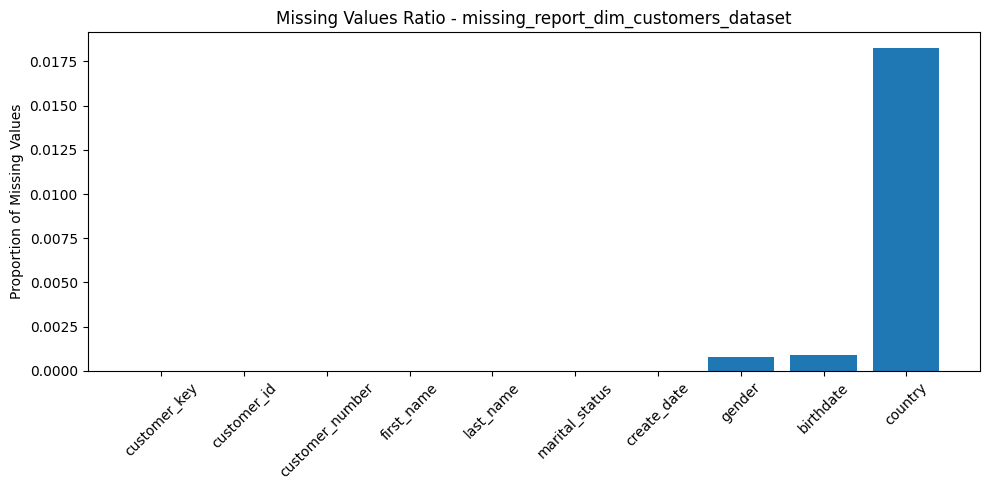

2026-02-20 09:35:15,684 - INFO - Plot generated for: missing_report_dim_customers_dataset.csv
2026-02-20 09:35:15,685 - INFO - Processing file: missing_report_dim_products_dataset.csv


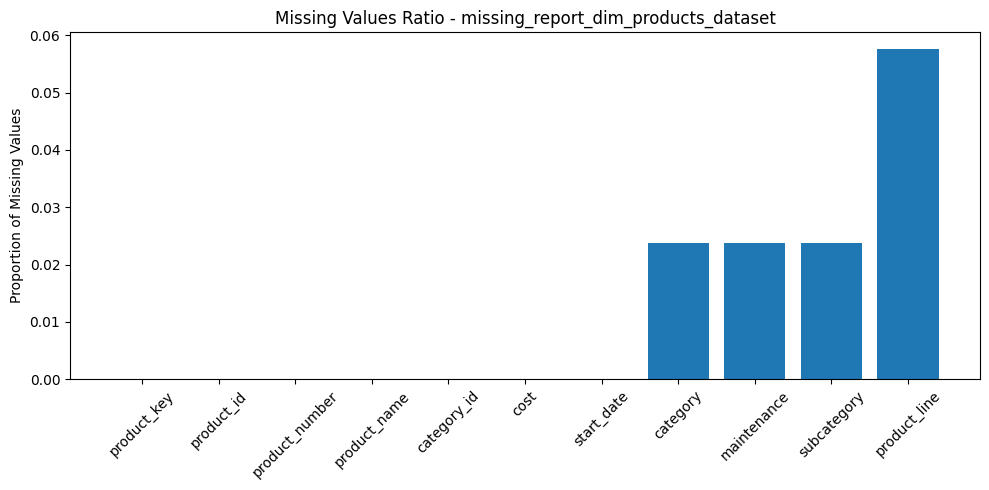

2026-02-20 09:35:16,000 - INFO - Plot generated for: missing_report_dim_products_dataset.csv
2026-02-20 09:35:16,001 - INFO - Processing file: missing_report_extra_data_dataset.csv


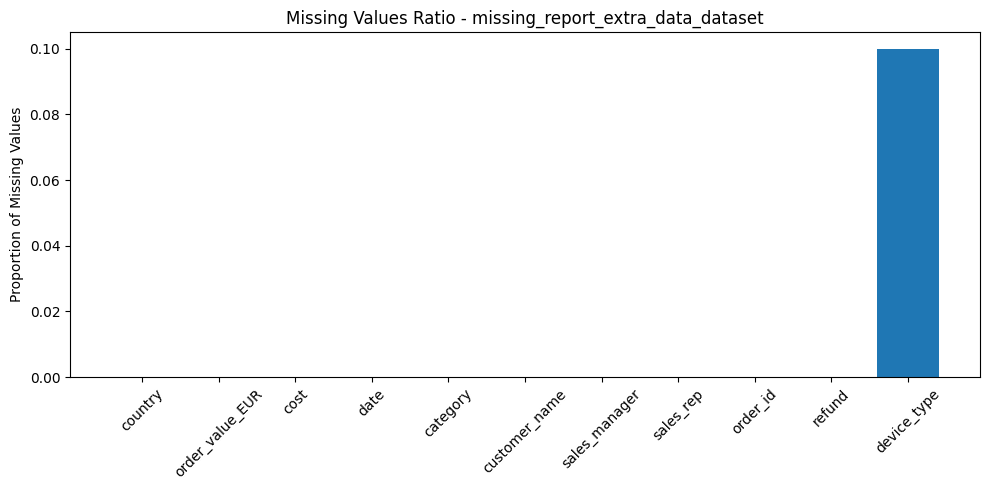

2026-02-20 09:35:16,485 - INFO - Plot generated for: missing_report_extra_data_dataset.csv
2026-02-20 09:35:16,487 - INFO - Processing file: missing_report_extra_variable_dataset.csv


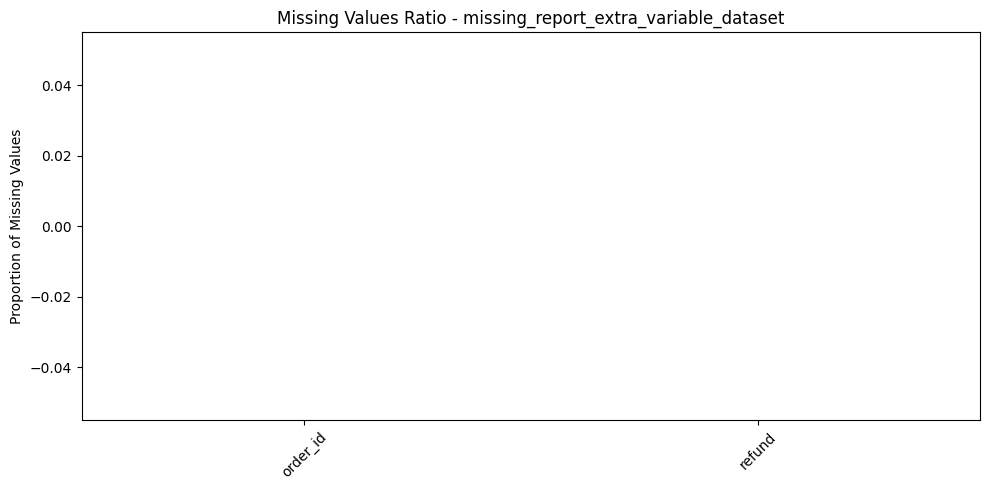

2026-02-20 09:35:16,712 - INFO - Plot generated for: missing_report_extra_variable_dataset.csv
2026-02-20 09:35:16,714 - INFO - Processing file: missing_report_fact_sales_dataset.csv


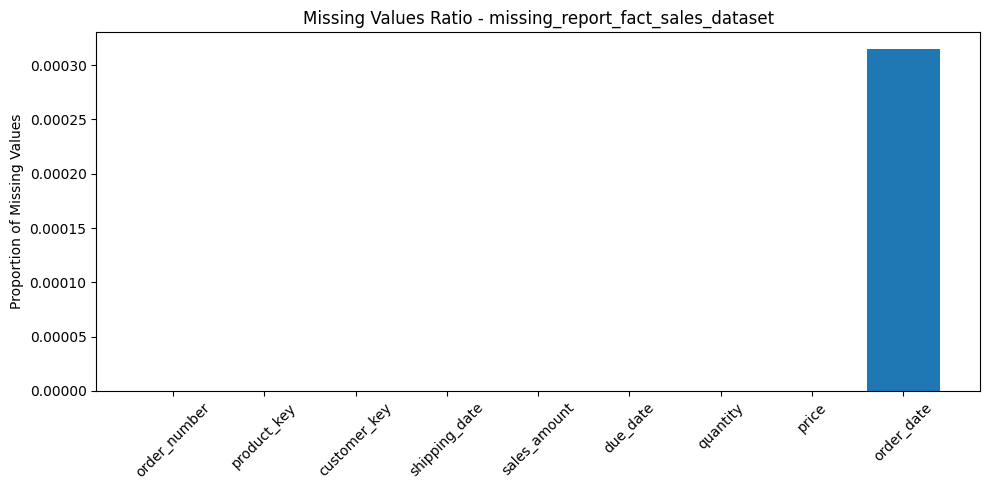

2026-02-20 09:35:17,018 - INFO - Plot generated for: missing_report_fact_sales_dataset.csv
2026-02-20 09:35:17,019 - INFO - Processing file: missing_report_sales_dataset.csv


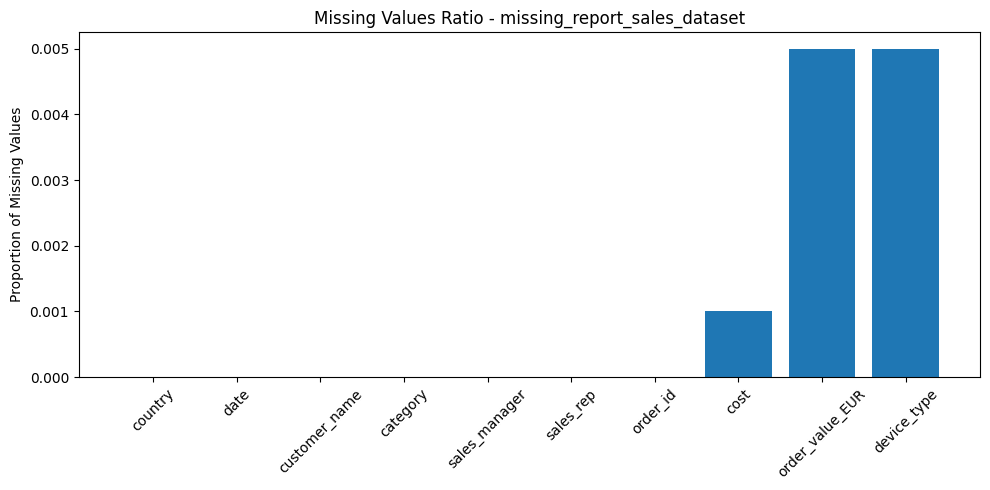

2026-02-20 09:35:17,322 - INFO - Plot generated for: missing_report_sales_dataset.csv
2026-02-20 09:35:17,323 - INFO - Processing file: missing_report_sample_dataset.csv


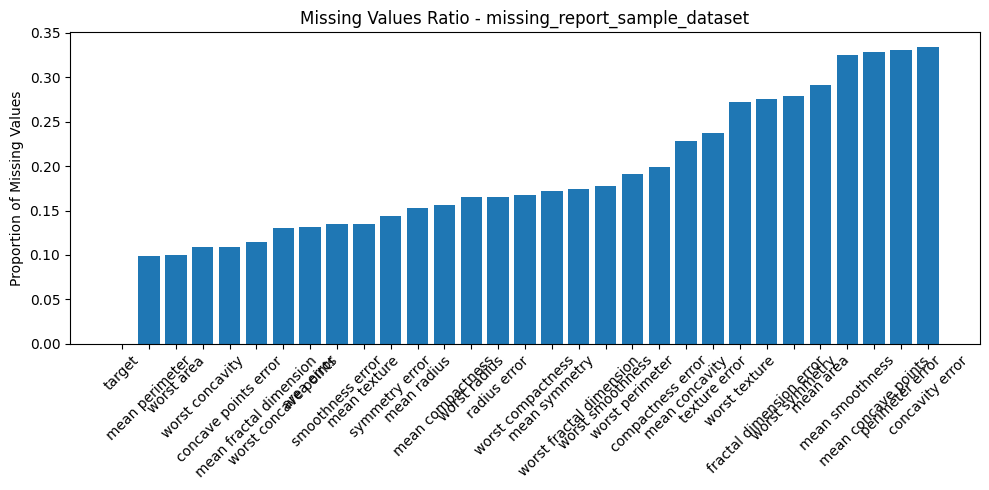

2026-02-20 09:35:17,907 - INFO - Plot generated for: missing_report_sample_dataset.csv


In [68]:
plotter = MissingDataPlotter()
plotter.plot_all()

# Dataset Simple Inputer Engine

In [107]:
import logging
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer


class DatasetImputer:

    def __init__(self, datasets: dict[str, pd.DataFrame]):
        self.datasets = datasets
        self.logger = self._configure_logger()
        self._validate_input()

    # ==========================================================
    # LOGGER
    # ==========================================================

    def _configure_logger(self) -> logging.Logger:
        logger = logging.getLogger("DatasetImputer")

        if not logger.handlers:
            logger.setLevel(logging.INFO)
            handler = logging.StreamHandler()
            formatter = logging.Formatter(
                "%(asctime)s | %(levelname)s | %(message)s"
            )
            handler.setFormatter(formatter)
            logger.addHandler(handler)

        return logger

    def _validate_input(self):
        if not isinstance(self.datasets, dict):
            raise TypeError("Datasets must be a dictionary.")
        if len(self.datasets) == 0:
            raise ValueError("Datasets dictionary is empty.")

        self.logger.info("Datasets validated successfully.")

    # ==========================================================
    # IMPUTATION LOGIC
    # ==========================================================

    def impute_all(self) -> dict[str, pd.DataFrame]:

        imputed_datasets = {}

        for name, df in self.datasets.items():

            self.logger.info(f"Processing dataset: {name}")

            df_imputed = df.copy()

            # -------------------------
            # NUMERIC (all numeric types)
            # -------------------------
            numeric_cols = df_imputed.select_dtypes(
                include=["number"]
            ).columns

            for col in numeric_cols:

                if df_imputed[col].isna().all():
                    df_imputed[col] = 0
                    continue

                imputer = SimpleImputer(strategy="median")
                df_imputed[[col]] = imputer.fit_transform(df_imputed[[col]])

                self.logger.info(f"Numeric column imputed: {col}")

            # -------------------------
            # CATEGORICAL
            # -------------------------
            categorical_cols = df_imputed.select_dtypes(
                include=["object", "category", "string"]
            ).columns

            for col in categorical_cols:

                if df_imputed[col].isna().all():
                    df_imputed[col] = "Unknown"
                    continue

                imputer = SimpleImputer(strategy="most_frequent")
                df_imputed[[col]] = imputer.fit_transform(df_imputed[[col]])

                self.logger.info(f"Categorical column imputed: {col}")

            # -------------------------
            # DATETIME (any datetime type)
            # -------------------------
            datetime_cols = df_imputed.select_dtypes(
                include=["datetime"]
            ).columns

            for col in datetime_cols:

                if df_imputed[col].isna().all():
                    df_imputed[col] = pd.Timestamp("1970-01-01")
                    continue

                numeric_dates = df_imputed[col].map(
                    lambda x: x.timestamp() if pd.notnull(x) else np.nan
                )

                imputer = SimpleImputer(strategy="median")
                imputed_values = imputer.fit_transform(
                    numeric_dates.values.reshape(-1, 1)
                ).flatten()

                df_imputed[col] = pd.to_datetime(imputed_values, unit="s")

                self.logger.info(f"Datetime column imputed: {col}")

            # -------------------------
            # FINAL SAFETY CHECK
            # -------------------------
            remaining_missing = df_imputed.isna().sum().sum()

            if remaining_missing > 0:
                self.logger.warning(
                    f"{name} still had {remaining_missing} missing values. Applying fallback."
                )

                df_imputed = df_imputed.fillna(0)

            else:
                self.logger.info(f"{name} fully imputed successfully.")

            imputed_datasets[name] = df_imputed

        self.logger.info("All datasets processed successfully.")
        return imputed_datasets

# Dataset Simple Inputer Engine Validation

In [108]:
def test_dataset_imputer():
    """
    Simple unit test for DatasetImputer.

    Validates:
    - Numeric imputation
    - Categorical imputation
    - Datetime imputation
    - No remaining missing values
    """

    import pandas as pd
    import numpy as np

    # Criando DataFrame de teste
    df = pd.DataFrame({
        "numeric_col": [1, 2, np.nan, 4],
        "categorical_col": ["A", None, "A", "B"],
        "order_date": pd.to_datetime(
            ["2023-01-01", None, "2023-01-03", None]
        ),
        "birthdate": pd.to_datetime(
            [None, "1990-05-01", None, "1985-08-10"]
        )
    })

    datasets = {"test_dataset": df}

    # Executando imputação
    imputer = DatasetImputer(datasets)
    imputed = imputer.impute_all()

    df_imputed = imputed["test_dataset"]

    # Garantir que não há valores faltantes
    total_missing = df_imputed.isna().sum().sum()
    assert total_missing == 0, "There are still missing values after imputation."

    # Garantir que tipos foram preservados
    assert pd.api.types.is_datetime64_any_dtype(df_imputed["order_date"]), \
        "order_date is no longer datetime."

    assert pd.api.types.is_datetime64_any_dtype(df_imputed["birthdate"]), \
        "birthdate is no longer datetime."

    # Garantir que numérica foi imputada com mediana
    expected_median = 2.0  # mediana de [1,2,4]
    assert expected_median in df_imputed["numeric_col"].values, \
        "Numeric median imputation failed."

    print("All tests passed successfully!")

# Test Execution - Dataset Simple Inputer Engine

In [109]:
test_dataset_imputer()

2026-02-20 10:23:03,564 | INFO | Datasets validated successfully.
2026-02-20 10:23:03,564 - INFO - Datasets validated successfully.
2026-02-20 10:23:03,567 | INFO | Processing dataset: test_dataset
2026-02-20 10:23:03,567 - INFO - Processing dataset: test_dataset
2026-02-20 10:23:03,578 | INFO | Numeric column imputed: numeric_col
2026-02-20 10:23:03,578 - INFO - Numeric column imputed: numeric_col
2026-02-20 10:23:03,587 | INFO | Categorical column imputed: categorical_col
2026-02-20 10:23:03,587 - INFO - Categorical column imputed: categorical_col
2026-02-20 10:23:03,596 | INFO | Datetime column imputed: order_date
2026-02-20 10:23:03,596 - INFO - Datetime column imputed: order_date
2026-02-20 10:23:03,602 | INFO | Datetime column imputed: birthdate
2026-02-20 10:23:03,602 - INFO - Datetime column imputed: birthdate
2026-02-20 10:23:03,607 | WARNING | test_dataset still had 1 missing values. Applying fallback.
2026-02-20 10:23:03,607 - WARNING - test_dataset still had 1 missing value

All tests passed successfully!


# Dataset Simple Inputer Engine Execution

In [122]:
imputer = DatasetImputer(clean_dfs)
imputed_dfs = imputer.impute_all()

2026-02-20 10:32:25,872 | INFO | Datasets validated successfully.
2026-02-20 10:32:25,872 - INFO - Datasets validated successfully.
2026-02-20 10:32:25,875 | INFO | Processing dataset: sample_dataset
2026-02-20 10:32:25,875 - INFO - Processing dataset: sample_dataset
2026-02-20 10:32:25,887 | INFO | Numeric column imputed: mean radius
2026-02-20 10:32:25,887 - INFO - Numeric column imputed: mean radius
2026-02-20 10:32:25,897 | INFO | Numeric column imputed: mean texture
2026-02-20 10:32:25,897 - INFO - Numeric column imputed: mean texture
2026-02-20 10:32:25,907 | INFO | Numeric column imputed: mean perimeter
2026-02-20 10:32:25,907 - INFO - Numeric column imputed: mean perimeter
2026-02-20 10:32:25,917 | INFO | Numeric column imputed: mean area
2026-02-20 10:32:25,917 - INFO - Numeric column imputed: mean area
2026-02-20 10:32:25,929 | INFO | Numeric column imputed: mean smoothness
2026-02-20 10:32:25,929 - INFO - Numeric column imputed: mean smoothness
2026-02-20 10:32:25,940 | INFO

# Dataset Info Profiler Execution

In [123]:
info_profiler = DatasetInfoProfiler(imputed_dfs)
info_results = info_profiler.export_all_infos_with_suffix("imputed_data")

2026-02-20 10:32:31,024 | INFO | Project root located at: C:\Users\User\Desktop\project-exploratory-data-analysis-framework
2026-02-20 10:32:31,024 - INFO - Project root located at: C:\Users\User\Desktop\project-exploratory-data-analysis-framework
2026-02-20 10:32:31,028 | INFO | Datasets validated successfully.
2026-02-20 10:32:31,028 - INFO - Datasets validated successfully.
2026-02-20 10:32:31,031 | INFO | Info export folder set to: C:\Users\User\Desktop\project-exploratory-data-analysis-framework\data\files\info
2026-02-20 10:32:31,031 - INFO - Info export folder set to: C:\Users\User\Desktop\project-exploratory-data-analysis-framework\data\files\info
2026-02-20 10:32:31,049 | INFO | Column info exported: C:\Users\User\Desktop\project-exploratory-data-analysis-framework\data\files\info\sample_dataset_columns_info_imputed_data.csv
2026-02-20 10:32:31,049 - INFO - Column info exported: C:\Users\User\Desktop\project-exploratory-data-analysis-framework\data\files\info\sample_dataset_co

# Missing Value Analyzer Engine Execution

In [124]:
analyzer = MissingValueAnalyzer(imputed_dfs)
analyzer.analyze_and_export_with_suffix("imputed_data")

2026-02-20 10:32:32,333 - INFO - Directory already exists: C:\Users\User\Desktop\project-exploratory-data-analysis-framework\data\files\missing_data
2026-02-20 10:32:32,335 - INFO - Datasets validated successfully.
2026-02-20 10:32:32,342 - INFO - Analyzing dataset: sample_dataset
2026-02-20 10:32:32,353 - INFO - Report exported successfully: C:\Users\User\Desktop\project-exploratory-data-analysis-framework\data\files\missing_data\missing_report_sample_dataset_imputed_data.csv
2026-02-20 10:32:32,355 - INFO - Analyzing dataset: sales_dataset
2026-02-20 10:32:32,366 - INFO - Report exported successfully: C:\Users\User\Desktop\project-exploratory-data-analysis-framework\data\files\missing_data\missing_report_sales_dataset_imputed_data.csv
2026-02-20 10:32:32,369 - INFO - Analyzing dataset: extra_variable_dataset
2026-02-20 10:32:32,378 - INFO - Report exported successfully: C:\Users\User\Desktop\project-exploratory-data-analysis-framework\data\files\missing_data\missing_report_extra_vari

# DIMENSION x MEASURE
- Dimesion is not a numeric value and If is, it is can not be aggregated
- Examples: category, product, birthdate, id
- Measure is numeric value and can be aggregated
- Examples: sales, quantity, age

# Dimension Column Profiler Engine

In [162]:
"""
dimension_column_profiler.py

Extended functionality:
- Identify dimension-like columns
- Export dimension structure
- Export object unique values
- Export object unique value counts
"""

import logging
import pandas as pd
from pathlib import Path


class DimensionColumnProfiler:

    def __init__(self, datasets: dict[str, pd.DataFrame]):

        self.datasets = datasets

        self.ignored_columns = [
            "cost",
            "quantity",
            "order_value_eur",
            "refund"
        ]

        self.project_root = Path().resolve().parent
        self.output_path = (
            self.project_root /
            "data" / "files" / "dimensions_columns"
        )

        self._configure_logging()
        self._create_output_directory()
        self._validate_input()

    # ==========================================================
    # PRIVATE
    # ==========================================================

    def _configure_logging(self) -> None:
        logging.basicConfig(
            level=logging.INFO,
            format="%(asctime)s | %(levelname)s | %(message)s"
        )

    def _create_output_directory(self) -> None:
        self.output_path.mkdir(parents=True, exist_ok=True)

    def _validate_input(self) -> None:
        if not isinstance(self.datasets, dict):
            raise TypeError("Datasets must be a dictionary.")
        if len(self.datasets) == 0:
            raise ValueError("Datasets dictionary is empty.")

    # ==========================================================
    # ORIGINAL LOGIC (INTACT)
    # ==========================================================

    def _build_dimension_rows(self, dataset_name: str, df: pd.DataFrame) -> list[dict]:

        result_rows = []

        for col in df.columns:

            if col.lower() in self.ignored_columns:
                continue

            dtype = df[col].dtype

            if not pd.api.types.is_numeric_dtype(dtype):

                result_rows.append({
                    "dataset": dataset_name,
                    "column": col,
                    "dtype": str(dtype)
                })

            else:
                unique_count = df[col].nunique()

                if unique_count <= 20:
                    result_rows.append({
                        "dataset": dataset_name,
                        "column": col,
                        "dtype": str(dtype)
                    })

        return result_rows

    def export_all(self) -> dict[str, pd.DataFrame]:

        results = {}

        for dataset_name, df in self.datasets.items():

            rows = self._build_dimension_rows(dataset_name, df)
            result_df = pd.DataFrame(rows)

            filename = f"{dataset_name}_dimension_columns.csv"
            filepath = self.output_path / filename

            result_df.to_csv(filepath, index=False)

            results[dataset_name] = result_df

        return results

    # ==========================================================
    # NEW FUNCTIONALITY
    # ==========================================================

    def export_object_unique_values(self) -> dict[str, pd.DataFrame]:
        """
        Export unique values for object columns (excluding ignored).
        """

        results = {}

        for dataset_name, df in self.datasets.items():

            unique_rows = []

            for col in df.columns:

                if col.lower() in self.ignored_columns:
                    continue

                if df[col].dtype == "object":

                    unique_values = df[col].dropna().unique()

                    for val in unique_values:
                        unique_rows.append({
                            "dataset": dataset_name,
                            "column": col,
                            "value": val
                        })

            result_df = pd.DataFrame(unique_rows)

            filename = f"{dataset_name}_object_unique_values.csv"
            filepath = self.output_path / filename

            result_df.to_csv(filepath, index=False)

            results[dataset_name] = result_df

        return results

    def export_object_unique_counts(self) -> dict[str, pd.DataFrame]:
        """
        Count number of unique values per object column
        and export one CSV per dataset.
        """

        results = {}

        for dataset_name, df in self.datasets.items():

            count_rows = []

            for col in df.columns:

                if col.lower() in self.ignored_columns:
                    continue

                if df[col].dtype == "object":

                    unique_count = df[col].dropna().nunique()

                    count_rows.append({
                        "dataset": dataset_name,
                        "column": col,
                        "unique_value_count": unique_count
                    })

            result_df = pd.DataFrame(count_rows)

            filename = f"{dataset_name}_object_unique_count.csv"
            filepath = self.output_path / filename

            result_df.to_csv(filepath, index=False)

            results[dataset_name] = result_df

        return results

# Dimension Column Profiler Engine Validation

In [166]:
def test_dimension_column_profiler():
    """
    Unit test for DimensionColumnProfiler.

    Validates:
    - Dimension export
    - Object unique values export
    - Object unique counts export
    - Ignored columns logic
    """

    import pandas as pd
    import tempfile
    from pathlib import Path

    # Criando DataFrame de teste
    df = pd.DataFrame({
        "category_col": ["A", "B", "A", None],
        "numeric_low_card": [1, 2, 1, 2],   # <=20 únicos
        "numeric_high_card": [1, 2, 3, 4],  # também <=20 (4 únicos)
        "cost": [10, 20, 30, 40]            # ignorada
    })

    datasets = {"test_dataset": df}

    with tempfile.TemporaryDirectory() as temp_dir:

        temp_path = Path(temp_dir)

        # Criar estrutura mínima para não quebrar a classe
        (temp_path / "data").mkdir()

        profiler = DimensionColumnProfiler(datasets)

        # Sobrescrever caminhos para ambiente isolado
        profiler.project_root = temp_path
        profiler.output_path = temp_path / "data" / "files" / "dimensions_columns"
        profiler.output_path.mkdir(parents=True, exist_ok=True)

        # Executar as 3 funcionalidades
        dim_results = profiler.export_all()
        unique_results = profiler.export_object_unique_values()
        count_results = profiler.export_object_unique_counts()

        # Verificar arquivos criados
        assert (profiler.output_path / "test_dataset_dimension_columns.csv").exists()
        assert (profiler.output_path / "test_dataset_object_unique_values.csv").exists()
        assert (profiler.output_path / "test_dataset_object_unique_count.csv").exists()

        # Verificar se coluna ignorada não aparece
        dim_df = dim_results["test_dataset"]
        assert "cost" not in dim_df["column"].values

        # Verificar se categoria aparece nos uniques
        unique_df = unique_results["test_dataset"]
        assert "category_col" in unique_df["column"].values

        # Verificar contagem correta
        count_df = count_results["test_dataset"]
        count_val = count_df.loc[
            count_df["column"] == "category_col",
            "unique_value_count"
        ].values[0]

        # Valores únicos em category_col → A, B → 2
        assert count_val == 2

    print("All tests passed successfully!")

# Test Execution - Dimension Column Profiler Engine

In [167]:
test_dimension_column_profiler()

All tests passed successfully!


# Dimension Column Profiler Engine Execution

In [165]:
profiler = DimensionColumnProfiler(imputed_dfs)
dimension_results = profiler.export_all()
unique_values_results = profiler.export_object_unique_values()
unique_count_results = profiler.export_object_unique_counts()

# Unique Value Extractor Engine

In [150]:
"""
unique_value_extractor.py

Module responsible for:
- Extracting unique non-null values per column
- Exporting one CSV per dataset
- Reading exported files and counting unique values per column
- Exporting count reports
"""

import logging
import pandas as pd
from pathlib import Path


class UniqueValueExtractor:

    def __init__(self, datasets: dict[str, pd.DataFrame]):

        self.datasets = datasets

        self.project_root = Path().resolve().parent
        self.output_path = (
            self.project_root /
            "data" / "files" / "unique_values"
        )

        self.logger = self._configure_logger()

        self._create_output_directory()
        self._validate_input()

    # ==========================================================
    # PRIVATE METHODS
    # ==========================================================

    def _configure_logger(self) -> logging.Logger:
        logger = logging.getLogger("UniqueValueExtractor")

        if not logger.handlers:
            logger.setLevel(logging.INFO)
            handler = logging.StreamHandler()
            formatter = logging.Formatter(
                "%(asctime)s | %(levelname)s | %(message)s"
            )
            handler.setFormatter(formatter)
            logger.addHandler(handler)

        return logger

    def _create_output_directory(self) -> None:
        if not self.output_path.exists():
            self.output_path.mkdir(parents=True, exist_ok=True)
            self.logger.info(f"Directory created: {self.output_path}")
        else:
            self.logger.info(f"Directory already exists: {self.output_path}")

    def _validate_input(self) -> None:
        if not isinstance(self.datasets, dict):
            raise TypeError("Datasets must be a dictionary.")
        if len(self.datasets) == 0:
            raise ValueError("Datasets dictionary is empty.")

        self.logger.info("Datasets validated successfully.")

    def _extract_unique_from_dataset(
        self,
        dataset_name: str,
        df: pd.DataFrame
    ) -> pd.DataFrame:

        col_dfs = []

        for col in df.columns:

            temp_df = pd.DataFrame({
                "column": col,
                "value": df[col].dropna().unique()
            })

            col_dfs.append(temp_df)

        if col_dfs:
            result_df = pd.concat(col_dfs, ignore_index=True)
        else:
            result_df = pd.DataFrame(columns=["column", "value"])

        return result_df

    # ==========================================================
    # EXPORT ORIGINAL
    # ==========================================================

    def export_all(self) -> dict[str, pd.DataFrame]:

        results = {}

        for dataset_name, df in self.datasets.items():

            self.logger.info(f"Processing dataset: {dataset_name}")

            result_df = self._extract_unique_from_dataset(
                dataset_name,
                df
            )

            filename = f"{dataset_name}_unique_values.csv"
            filepath = self.output_path / filename

            result_df.to_csv(filepath, index=False)

            self.logger.info(f"Exported: {filepath}")

            results[dataset_name] = result_df

        self.logger.info("All unique value files exported successfully.")

        return results

    # ==========================================================
    # NOVA FUNCIONALIDADE
    # ==========================================================

    def export_unique_value_counts(self) -> dict[str, pd.DataFrame]:
        """
        Read each *_unique_values.csv file,
        count number of values per column,
        and export a new CSV:
            <dataset>_unique_value_count.csv
        """

        results = {}

        csv_files = list(self.output_path.glob("*_unique_values.csv"))

        for file_path in csv_files:

            df = pd.read_csv(file_path)

            if df.empty:
                self.logger.warning(f"{file_path.name} is empty.")
                continue

            # Contagem correta por coluna
            count_df = (
                df.groupby("column")["value"]
                .count()
                .reset_index()
                .rename(columns={"value": "unique_value_count"})
            )

            dataset_name = file_path.stem.replace(
                "_unique_values", ""
            )

            new_filename = f"{dataset_name}_unique_value_count.csv"
            new_filepath = self.output_path / new_filename

            count_df.to_csv(new_filepath, index=False)

            self.logger.info(f"Exported count file: {new_filepath}")

            results[dataset_name] = count_df

        return results

# Unique Value Extractor Engine Validation

In [153]:
def test_unique_value_extractor():
    """
    Simple unit test for UniqueValueExtractor.

    Validates:
    - Unique value export
    - Unique value count export
    - Correct counting logic per column
    """

    import pandas as pd
    import tempfile
    from pathlib import Path

    # Criando DataFrame de teste
    df = pd.DataFrame({
        "A": ["x", "y", "x", None],
        "B": [1, 2, 2, 3]
    })

    datasets = {"test_dataset": df}

    with tempfile.TemporaryDirectory() as temp_dir:

        temp_path = Path(temp_dir)

        # Criando estrutura mínima
        (temp_path / "data").mkdir()

        extractor = UniqueValueExtractor(datasets)

        # Sobrescrevendo caminho para ambiente isolado
        extractor.project_root = temp_path
        extractor.output_path = temp_path / "data" / "files" / "unique_values"
        extractor.output_path.mkdir(parents=True, exist_ok=True)

        # Exportar valores únicos
        extractor.export_all()

        unique_file = extractor.output_path / "test_dataset_unique_values.csv"
        assert unique_file.exists(), "Unique values CSV not created."

        # Exportar contagem
        counts = extractor.export_unique_value_counts()

        count_file = extractor.output_path / "test_dataset_unique_value_count.csv"
        assert count_file.exists(), "Unique value count CSV not created."

        count_df = counts["test_dataset"]

        # Verificar contagem correta
        # Coluna A tem valores únicos: x, y → 2
        # Coluna B tem valores únicos: 1,2,3 → 3

        count_A = count_df.loc[count_df["column"] == "A", "unique_value_count"].values[0]
        count_B = count_df.loc[count_df["column"] == "B", "unique_value_count"].values[0]

        assert count_A == 2, "Incorrect unique count for column A."
        assert count_B == 3, "Incorrect unique count for column B."

    print("All tests passed successfully!")

# Test Execution - Unique Value Extractor Engine

In [154]:
test_unique_value_extractor()

2026-02-20 11:35:38,370 | INFO | Directory already exists: C:\Users\User\Desktop\project-exploratory-data-analysis-framework\data\files\unique_values
2026-02-20 11:35:38,370 - INFO - Directory already exists: C:\Users\User\Desktop\project-exploratory-data-analysis-framework\data\files\unique_values
2026-02-20 11:35:38,373 | INFO | Datasets validated successfully.
2026-02-20 11:35:38,373 - INFO - Datasets validated successfully.
2026-02-20 11:35:38,377 | INFO | Processing dataset: test_dataset
2026-02-20 11:35:38,377 - INFO - Processing dataset: test_dataset
2026-02-20 11:35:38,385 | INFO | Exported: C:\Users\User\AppData\Local\Temp\tmpu4gxt6lg\data\files\unique_values\test_dataset_unique_values.csv
2026-02-20 11:35:38,385 - INFO - Exported: C:\Users\User\AppData\Local\Temp\tmpu4gxt6lg\data\files\unique_values\test_dataset_unique_values.csv
2026-02-20 11:35:38,388 | INFO | All unique value files exported successfully.
2026-02-20 11:35:38,388 - INFO - All unique value files exported succ

All tests passed successfully!


# Unique Value Extractor Engine Execution

In [156]:
extractor = UniqueValueExtractor(imputed_dfs)
extractor.export_all()

2026-02-20 11:47:33,064 | INFO | Directory already exists: C:\Users\User\Desktop\project-exploratory-data-analysis-framework\data\files\unique_values
2026-02-20 11:47:33,064 - INFO - Directory already exists: C:\Users\User\Desktop\project-exploratory-data-analysis-framework\data\files\unique_values
2026-02-20 11:47:33,068 | INFO | Datasets validated successfully.
2026-02-20 11:47:33,068 - INFO - Datasets validated successfully.
2026-02-20 11:47:33,071 | INFO | Processing dataset: sample_dataset
2026-02-20 11:47:33,071 - INFO - Processing dataset: sample_dataset
2026-02-20 11:47:33,130 | INFO | Exported: C:\Users\User\Desktop\project-exploratory-data-analysis-framework\data\files\unique_values\sample_dataset_unique_values.csv
2026-02-20 11:47:33,130 - INFO - Exported: C:\Users\User\Desktop\project-exploratory-data-analysis-framework\data\files\unique_values\sample_dataset_unique_values.csv
2026-02-20 11:47:33,134 | INFO | Processing dataset: sales_dataset
2026-02-20 11:47:33,134 - INFO 

{'sample_dataset':                         column    value
 0                  mean radius    13.28
 1                  mean radius    20.57
 2                  mean radius    19.69
 3                  mean radius    11.42
 4                  mean radius    20.29
 ...                        ...      ...
 12096  worst fractal dimension   0.0782
 12097  worst fractal dimension    0.124
 12098  worst fractal dimension  0.07039
 12099                   target      0.0
 12100                   target      1.0
 
 [12101 rows x 2 columns],
 'sales_dataset':         column       value
 0      country      Sweden
 1      country      France
 2      country    Portugal
 3      country       Italy
 4      country     Germany
 ...        ...         ...
 3678  order_id  07-3201531
 3679  order_id  77-0650807
 3680  order_id  44-2757396
 3681  order_id  22-7259031
 3682  order_id  60-6986682
 
 [3683 rows x 2 columns],
 'extra_variable_dataset':         column       value
 0     order_id  70-051146

# Unique Value Count Extractor Engine Execution

In [157]:
count_results = extractor.export_unique_value_counts()

2026-02-20 11:48:04,435 | INFO | Exported count file: C:\Users\User\Desktop\project-exploratory-data-analysis-framework\data\files\unique_values\dim_customers_dataset_unique_value_count.csv
2026-02-20 11:48:04,435 - INFO - Exported count file: C:\Users\User\Desktop\project-exploratory-data-analysis-framework\data\files\unique_values\dim_customers_dataset_unique_value_count.csv
2026-02-20 11:48:04,472 | INFO | Exported count file: C:\Users\User\Desktop\project-exploratory-data-analysis-framework\data\files\unique_values\dim_products_dataset_unique_value_count.csv
2026-02-20 11:48:04,472 - INFO - Exported count file: C:\Users\User\Desktop\project-exploratory-data-analysis-framework\data\files\unique_values\dim_products_dataset_unique_value_count.csv
2026-02-20 11:48:04,504 | INFO | Exported count file: C:\Users\User\Desktop\project-exploratory-data-analysis-framework\data\files\unique_values\extra_data_dataset_unique_value_count.csv
2026-02-20 11:48:04,504 - INFO - Exported count file: C

# Count the Dataset in the Dictionary

In [ ]:
len(unique_dfs)

# SORTING DATASET

In [ ]:
for name, df in dfs_imputed.items():
    
    if 'cost' in df.columns:
        dfs_imputed[name] = df.sort_values('cost', ascending=True)

# MERGING DATAFRAMES

In [ ]:
dfs_imputed['sales_extra_variables'] = dfs_imputed['sales'].merge(
    dfs_imputed['extra_variable'],
    on='order_id',
    how='left'
)

dfs_imputed['sales_extra_variables'].info()

# CONCAT DATAFRAMES

In [ ]:
dfs_imputed['sales_extra_variables_extra_data'] = pd.concat(
    [dfs_imputed['sales_extra_variables'], dfs_imputed['extra_data']],
    ignore_index=True
)

# INSIGHTFUL DATA FILTERING BY COLUMN

# COUNTRY COLUMN DATASET

#  FRANCE DATASET

In [ ]:
france_list = []

for name, df in dfs_imputed.items():

    if name in ['sales', 'extra_variable', 'extra_data']:
        if 'country' in df.columns:
            france_list.append(df[df['country'] == 'France'])

france_df = pd.concat(france_list, ignore_index=True)

display(france_df)

# NOT FRANCE DATASET

In [ ]:
not_france_list = []

for name, df in dfs_imputed.items():

    if name in ['sales', 'extra_variable', 'extra_data']:
        if 'country' in df.columns:
            not_france_list.append(df[df['country'] != 'France'])

not_france_list = pd.concat(not_france_list, ignore_index=True)

display(not_france_list)

# DATE EXPLORATION
- Identify he earliest and atest dates (boundaries).
- Unerstand the scope of data and the timespan.
- Example:
- MIN/MAX(Date Dimesion)
- Min Order-date
- Max Create_date
- Min Birthdate
- DIFFDATE

# LIST OF ALL DATETIMES COLUMNS

In [ ]:
results_dataframe_column_dtype = []

for dataset_name, df in dfs_imputed.items():
    
    for col in df.columns:
        
        is_datetime = pd.api.types.is_datetime64_any_dtype(df[col])
        has_date_in_name = "date" in col.lower()
        
        if is_datetime or has_date_in_name:
            results_dataframe_column_dtype.append({
                "dataframe": dataset_name,
                "column": col,
                "dtype": df[col].dtype
            })

results_dataframe_column_dtype_df = pd.DataFrame(results_dataframe_column_dtype)

results_dataframe_column_dtype_df

# QUESTIONS ABOUT THESE DATETIMES COLUMNS TO DO 

### Sales (sales.date, fact_sales.order_date)

Strategic Questions:

- How have sales evolved over the years?
- Is there monthly or quarterly seasonality?
- What is the best month for sales?
- Are there declines during specific periods?
- Year-over-Year (YoY) growth?
- What is the average monthly ticket size?
- Are there sales peaks on specific dates?
- Possible insight: Identify strong periods for campaigns and demand forecasting.

### Logistics (shipping_date, due_date)

Operational Questions:

- What is the average time between order placement and shipment?
- What is the average time between order placement and delivery?
- How many orders were delivered after the due date?
- Has logistics performance improved over time?
- Are there specific months with more delays?
- Possible insight: Logistics efficiency and its impact on customer satisfaction.

### Customers (birthdate, create_date)

Strategic Questions:

- What is the average age of customers?
- Which age group purchases the most?
- How many new customers are acquired per month?
- Is there churn (decline in new registrations)?
- What is the average time between registration and first purchase?
- Do older customers spend more?

Possible insight: Age-based segmentation and customer retention strategies.

### Products (start_date)
Portfolio Questions:

- Do newer products sell more?
- How long does it take for a product to gain traction?
- Do older products lose performance over time?
- Revenue by product lifetime?
- Possible insight: Product life cycle analysis.

### Cross Insights (Most Valuable)

- Here are the truly strategic questions:
- Do new customers purchase more than long-term customers?
- Do younger customers generate higher ticket values?
- Do delivery delays impact repurchase behavior?
- Which age group buys newly launched products the most?
- Is seasonality different across age groups?
- What is the average time between purchases per customer?
- Revenue by cohort (based on registration month)?

### Executive-Level Questions

- If presenting to the board:
- What is the compound annual growth rate (CAGR)?
- What is the average logistics service time?
- What is the average customer lifetime (temporal LTV)?
- Are we accelerating customer acquisition?
- Is there a risk of an aging customer base?

### Conclusion

- These date-related columns allow analysis of:
- Sales performance
- Operational efficiency
- Customer profile and lifecycle
- Portfolio performance
- Seasonality
- Business growthprofile and lifecycle
Portfolio performance
Seasonality
Business growthPerformance do portfólio
- Sazonalidade
- Crescimento do negócio

In [ ]:
dfs_imputed.keys()

In [ ]:
# Acessando o dataframe dentro do dicionário
df_fact_sales = dfs_imputed["fact_sales"]

# Garantir formato datetime
df_fact_sales["order_date"] = pd.to_datetime(df_fact_sales["order_date"])

# Calcular métricas
result_df_date_years = pd.DataFrame({
    "first_order_date": [df_fact_sales["order_date"].min()],
    "last_order_date": [df_fact_sales["order_date"].max()],
    "order_range_years": [
        df_fact_sales["order_date"].max().year - df_fact_sales["order_date"].min().year
    ]
})

result_df_date_years


In [ ]:
df_fact_sales = dfs_imputed["fact_sales"]

# Garantir datetime
df_fact_sales["order_date"] = pd.to_datetime(df_fact_sales["order_date"])

first_date = df_fact_sales["order_date"].min()
last_date = df_fact_sales["order_date"].max()

# Diferença em meses
order_range_months = (
    (last_date.year - first_date.year) * 12
    + (last_date.month - first_date.month)
)

result_df_date_months = pd.DataFrame({
    "first_order_date": [first_date],
    "last_order_date": [last_date],
    "order_range_months": [order_range_months]
})

result_df_date_months


In [ ]:
# Acessando o dataframe no dicionário
df_customers = dfs_imputed["dim_customers"]

# Garantir formato datetime
df_customers["birthdate"] = pd.to_datetime(df_customers["birthdate"])

# Datas extrema
oldest_birthdate = df_customers["birthdate"].min()
youngest_birthdate = df_customers["birthdate"].max()

# Data atual
today = pd.Timestamp.today()

# Cálculo idade (equivalente ao DATEDIFF(year,...))
oldest_age = today.year - oldest_birthdate.year
youngest_age = today.year - youngest_birthdate.year

# Resultado final
result_df_age_oldest_youngest = pd.DataFrame({
    "oldest_birthdate": [oldest_birthdate],
    "oldest_age": [oldest_age],
    "youngest_birthdate": [youngest_birthdate],
    "youngest_age": [youngest_age]
})

result_df_age_oldest_youngest


# MEASURE EXPLORATION
- Calculate the key metric of the Business (Big numbers)
- Highest level of aggregation | lowerst level of details
- SUM(Measure)

### BIG NUMBERS (Top-Level KPIs)
### Revenue & Volume

- What is the total revenue generated?
- What is the total quantity sold?
- What is the average selling price?
- What is the total number of orders?
- What is the total number of active customers?
- What percentage of customers actually placed orders?
- What is revenue per order?
- What is revenue per customer?
- Is revenue growing faster th
### DRILL DOWN (Aggregation by Dimension)
### Geography

- Which country generates the highest revenue?
- Which country has the highest average order value?
- Which country has the highest customer concentration?
- Are we over-dependent on a single country?

### Product & Category

- Which product generates the most revenue?
- Which category generates the highest revenue?
- Which subcategory has the highest margin potential?
- Do a small number of products drive most of the revenue (Pareto 80/20)?

### Sales Team

- Which sales manager generates the most revenue?
- Which sales rep closes the most deals?
- Who generates the highest revenue per order?
- Is performance evenly distributed across the sales team?

### Channel / Device

- Which device generates the highest revenue?
- Which device has the highest average order value?
- Is mobile revenue growing faster than desktop?

### COST, PROFIT & MARGIN ANALYSIS

- What is total product cost?
- What is gross revenue vs total cost?
- What is total refund amount?
- What percentage of revenue is lost due to refunds?
- Which products have the highest cost-to-revenue ratio?
- Which categories have the best margin potential?
- Are we selling high volume but low margin products?

### CUSTOMER VALUE & CONCENTRATION

- What is revenue per customer?
- What is the revenue distribution across customers?
- Do the top 10% of customers generate most revenue?
- Is revenue highly concentrated in a few customers?
- Are older customers more valuable?
- Which demographic group generates the highest revenue?
- What is the average order frequency per customer?

### PRODUCT PERFORMANCE & PORTFOLIO STRATEGY

- Which product line sustains the business?
- Do new products outperform old ones?
- Which product has the highest revenue per unit sold?
- Are we carrying low-performing products?
- Which products should be discontinued?
- Which product lines drive cross-selling opportunities?

### RISK & DEPENDENCY ANALYSIS

- Is revenue concentrated in one product line?
- Is revenue dependent on one country?
- Is revenue dependent on one sales manager?
- What happens if the top 5 customers churn?
- Are refunds concentrated in specific products?
- Are high-priced products more likely to be refunded?

### STRATEGIC EXECUTIVE QUESTIONS (Board Level)

- What is the compound annual growth rate (CAGR)?
- Are we scaling revenue sustainably?
- Is growth driven by price increase or volume increase?
- Are we maximizing margin or focusing only on sales volume?
- What is the long-term customer value potential?
- Where should we allocate investment: geography, product, or sales team?
- Are we operationally efficient relative to revenue growth?
- What are the biggest drivers of revenue volatility?

### Advanced Measure Exploration Mindset

Instead of only asking:

"What is the total revenue?"

We also ask:

- What drives revenue?
- Where is revenue concentrated?
- What is the risk exposure?
- What is the profitability structure?
- What is scalable?
- What is fragile? is the risk exposure?
- What is the profitability structure?
- What is scalable?
- What is fragile?
What is the risk exposure?
What is the profitability structure?
What is scalable?
What is fragile?

In [ ]:
df_fact = dfs_imputed["fact_sales"]
df_products = dfs_imputed["dim_products"]
df_customers = dfs_imputed["dim_customers"]

result = pd.DataFrame({

    # Total Sales
    "total_sales": [df_fact["sales_amount"].sum()],
    
    # Total Quantity Sold
    "total_quantity": [df_fact["quantity"].sum()],
    
    # Average Selling Price
    "avg_price": [df_fact["price"].mean()],
    
    # Total number of orders
    "total_orders": [df_fact["order_number"].count()],
    
    # Total distinct orders
    "total_distinct_orders": [df_fact["order_number"].nunique()],
    
    # Total number of products
    "total_products": [df_products["product_name"].count()],
    
    # Total number of customers
    "total_customers": [df_customers["customer_key"].count()],
    
    # Customers who placed at least one order
    "customers_with_orders": [df_fact["customer_key"].nunique()]

})

result


In [ ]:
results = []

for dataset_name, df in dfs_imputed.items():
    
    for col in df.columns:
        
        is_datetime = pd.api.types.is_datetime64_any_dtype(df[col])
        has_date_in_name = "date" in col.lower()
        
        # condição negativa
        if not is_datetime and not has_date_in_name:
            results.append({
                "dataframe": dataset_name,
                "column": col,
                "dtype": df[col].dtype
            })

result_df = pd.DataFrame(results)

In [ ]:
result_df.to_csv("../data/files/arquivo.txt", index=False)

# Magnitude Analsis
- Compare the measure values by categories
- It heps us understand the importanc eof different categories
- Example:
- sum(Measure) By (Dimension)

### Revenue Magnitude Analysis
Using fact_sales.sales_amount

- What is the total revenue by product_key?
- What is the total revenue by customer_key?
- What is the total revenue by country (via join with dim_customers)?
- What is the total revenue by product category (via join with dim_products.category)?
- What is the total revenue by product line?
- What is the total revenue by subcategory?
- What is the total revenue by sales_manager (via sales dataset)?
- What is the total revenue by sales_rep?
- What is the total revenue by device_type?
- What is the total revenue by gender?

### Quantity Magnitude Analysis
Using fact_sales.quantity

- What is the total quantity sold by product?
- What is the total quantity sold by category?
- What is the total quantity sold by country?
- What is the total quantity sold by sales_rep?
- What is the total quantity sold by product_line?
- Which category drives the highest sales volume?

### Price Magnitude Analysis
Using fact_sales.price

- What is the total revenue impact by price segment?
- What is the total price contribution by category?
- What is the total price contribution by country?

### Refund Magnitude Analysis
Using extra_data.refund

- What is the total refund amount by country?
- What is the total refund amount by category?
- What is the total refund amount by sales_rep?
- Which device type generates the highest refund value?

Are refunds concentrated in specific product categories?

### Cost Magnitude Analysis
Using dim_products.cost or extra_data.cost

- What is the total cost by category?
- What is the total cost by product_line?
- What is the total cost by subcategory?
- Which category has the highest total cost structure?

### Customer Magnitude Analysis
Using fact_sales.sales_amount

- What is the total revenue by marital_status?
- What is the total revenue by marital_status?
- What is the total revenue by gender?
- What is the total revenue by country (customer dimension)?
- Which demographic segment contributes most to total revenue?

### Clinical Dataset (sample dataset)

Although not business-focused, magnitude can still be applied:
Using sample.mean area or sample.worst area
- What is the total mean area by target (benign vs malignant)?
- What is the total worst perimeter by target?
- What is the total concavity by target?

### Strategic Magnitude Questions

- Is revenue concentrated in one product category?
- Is volume concentrated in one country?
- Is refund magnitude higher in specific segments?
- Which dimension explains the largest revenue magnitude?
- Do a small number of customers generate most of the revenue?
- Which product line sustains the business financially?

### Why Magnitude Analysis Matters

- Magnitude Analysis helps:
- Identify dominant categories
- Detect revenue concentration risk
- Understand structural dependency
- Prioritize strategic focus areas
- Detect imbalance in business structureendency
Prioritize strategic focus areas
Detect imbalance in business structureexposure?
- What is the profitability structure?
- What is scalable?
- What is fragile?

In [ ]:
df_customers = dfs_imputed["dim_customers"]

total_customers_country = (
    df_customers
    .groupby("country")["customer_key"]
    .count()
    .reset_index(name="total_customers")
    .sort_values(by="total_customers", ascending=False)
)

total_customers_country

In [ ]:
total_customers_gender = (
    df_customers
    .groupby("gender")["customer_key"]
    .count()
    .reset_index(name="total_customers")
    .sort_values(by="total_customers", ascending=False)
)

total_customers_gender

In [ ]:
df_products = dfs_imputed["dim_products"]

total_products_category = (
    df_products
    .groupby("category")["product_key"]
    .count()
    .reset_index(name="total_products")
    .sort_values(by="total_products", ascending=False)
)

total_products_category

In [ ]:
avg_cost_category = (
    df_products
    .groupby("category")["cost"]
    .mean()
    .reset_index(name="avg_cost")
    .sort_values(by="avg_cost", ascending=False)
)

avg_cost_category

In [ ]:
df_fact = dfs_imputed["fact_sales"]

revenue_by_category = (
    df_fact
    .merge(df_products, on="product_key", how="left")
    .groupby("category")["sales_amount"]
    .sum()
    .reset_index(name="total_revenue")
    .sort_values(by="total_revenue", ascending=False)
)

revenue_by_category


In [ ]:
revenue_by_customer = (
    df_fact
    .merge(df_customers, on="customer_key", how="left")
    .groupby(["customer_key", "first_name", "last_name"])["sales_amount"]
    .sum()
    .reset_index(name="total_revenue")
    .sort_values(by="total_revenue", ascending=False)
)

revenue_by_customer


In [ ]:
sold_items_by_country = (
    df_fact
    .merge(df_customers, on="customer_key", how="left")
    .groupby("country")["quantity"]
    .sum()
    .reset_index(name="total_sold_items")
    .sort_values(by="total_sold_items", ascending=False)
)

sold_items_by_country


# Ranking Analysis
- Order the values of dimensions by measure.
- Top N performers | Bottom N Performers
- Example
- Rank (Dimension) By Sum(Measure)

### Revenue Ranking (Core Business Ranking)
Using fact_sales.sales_amount

- What are the Top 10 products ranked by total revenue?
- What are the Bottom 10 products ranked by total revenue?
- Which Top 5 product categories generate the highest revenue?
- Which categories are the lowest revenue contributors?
- What are the Top 10 customers ranked by total revenue?
- Which customers generate the least revenue?
- Which Top 5 countries generate the most revenue?
- Which countries contribute the least to total revenue?
- Who are the Top 5 sales reps ranked by revenue?
- Who are the lowest-performing sales reps?

### Volume Ranking (Sales Quantity Perspective)
Using fact_sales.quantity

- Which products are the Top 10 best-selling by quantity?
- Which products are the least sold by quantity?
- Which country ranks highest in total units sold?
- Which category ranks highest in sales volume?
- Which sales rep sells the most units?
- Which product line drives the highest volume?

### Refund Ranking (Risk & Loss Analysis)
Using extra_data.refund

- Which categories have the highest total refund amounts?
- Which products generate the most refunds?
- Which sales rep is associated with the highest refund value?
- Which country has the highest refund magnitude?
- Which device type leads in total refund value?
- What are the bottom 5 categories with the lowest refund impact?

### Cost Ranking (Cost Structure Analysis)
Using dim_products.cost

- Which categories have the highest total cost?
- Which product line has the highest cost structure?
- Which products have the highest unit cost?
- Which categories have the lowest cost structure?
 
### Customer Ranking (Customer Value Analysis)
Using fact_sales.sales_amount

- Rank customers by total revenue contribution.
- Who are the top 10% customers by revenue?
- Who are the bottom 10% customers?
- Which gender ranks highest in total revenue?
- Which marital status group generates the highest revenue?
- Which country ranks highest in number of customers?

### Product Portfolio Ranking
Using sales_amount + dim_products.category

- Which product lines sustain the business financially?
- Which subcategories underperform?
- Are there products generating revenue but at very low ranking?
- Which products dominate their category ranking?

### Concentration & Dependency Ranking

- Does the Top 5 products represent more than 50% of revenue?
- Does the Top 10 customers represent the majority of revenue?
- Is revenue concentrated in one country?
- Are refunds concentrated in specific products?
- Is volume concentrated in low-margin products?

### Clinical Dataset Ranking (sample dataset)

- Although non-business, ranking still applies:
- Rank tumors by worst area.
- Rank cases by mean concavity.
- Rank patients by worst perimeter.
- Compare top 5 highest concave points between malignant vs benign.

### Strategic Business Value of Ranking Analysis

- Ranking helps you:
- Identify performance leaders
- Detect underperformers
- Reveal revenue concentration risk
- Prioritize investment decisions
- Optimize portfolio strategy
- Improve sales team performance

In [ ]:
df_fact = dfs_imputed["fact_sales"]
df_products = dfs_imputed["dim_products"]

top_5_products = (
    df_fact
    .merge(df_products, on="product_key", how="left")
    .groupby("product_name")["sales_amount"]
    .sum()
    .reset_index(name="total_revenue")
    .sort_values(by="total_revenue", ascending=False)
    .head(5)
)

top_5_products

In [ ]:
ranked_products = (
    df_fact
    .merge(df_products, on="product_key", how="left")
    .groupby("product_name")["sales_amount"]
    .sum()
    .reset_index(name="total_revenue")
)

ranked_products["rank_products"] = (
    ranked_products["total_revenue"]
    .rank(method="dense", ascending=False)
)

top_5_ranked = ranked_products[ranked_products["rank_products"] <= 5] \
    .sort_values(by="rank_products")

top_5_ranked

In [ ]:
worst_5_products = (
    df_fact
    .merge(df_products, on="product_key", how="left")
    .groupby("product_name")["sales_amount"]
    .sum()
    .reset_index(name="total_revenue")
    .sort_values(by="total_revenue", ascending=True)
    .head(5)
)

worst_5_products

In [ ]:
df_customers = dfs_imputed["dim_customers"]

top_10_customers = (
    df_fact
    .merge(df_customers, on="customer_key", how="left")
    .groupby(["customer_key", "first_name", "last_name"])["sales_amount"]
    .sum()
    .reset_index(name="total_revenue")
    .sort_values(by="total_revenue", ascending=False)
    .head(10)
)

top_10_customers

In [ ]:
bottom_3_customers_orders = (
    df_fact
    .merge(df_customers, on="customer_key", how="left")
    .groupby(["customer_key", "first_name", "last_name"])["order_number"]
    .nunique()
    .reset_index(name="total_orders")
    .sort_values(by="total_orders", ascending=True)
    .head(3)
)

bottom_3_customers_orders

In [ ]:
dfs_imputed.keys()

In [ ]:
#What is the primary country of residence for the majority of our customers?

country_frequencies = dfs_imputed['sales_extra_variables_extra_data']['country'].value_counts()

In [ ]:
country_frequencies

In [ ]:
# Create a bar plot for the frequencies
plt.figure(figsize=(8, 5))
country_frequencies.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('The primary country of residence for the majority of our customers')
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.show()

In [ ]:
#Which product category has the highest frequency of sales?

productcat_frequencies = dfs_imputed['sales_extra_variables_extra_data']['category'].value_counts()
productcat_frequencies

In [ ]:
plt.figure(figsize=(8, 5))
productcat_frequencies.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('The product category has the highest frequency of sales')
plt.xlabel('Products category')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.show()

In [ ]:
#Identify the top 5 customers with the most repeat purchases.

customers_frequencies = dfs_imputed['sales_extra_variables_extra_data']['customer_name'].value_counts()

In [ ]:
customers_frequencies

In [ ]:
#Who among the sales managers has achieved the highest number of sales?

salesman_frequencies = dfs_imputed['sales_extra_variables_extra_data']['sales_manager'].value_counts()
salesman_frequencies

In [ ]:
#Who are the top 5 sales representatives with the highest number of sales?

salesrep_frequencies = dfs_imputed['sales_extra_variables_extra_data']['sales_rep'].value_counts()
salesrep_frequencies

In [ ]:
#Which device is predominantly used for making product purchases?

devtype_frequencies = dfs_imputed['sales_extra_variables_extra_data']['device_type'].value_counts()
devtype_frequencies

In [ ]:
# Calculate relative frequencies (percentages)
devtype_percentages = (devtype_frequencies / devtype_frequencies.sum()) * 100

# Create a pie chart for the percentages
plt.figure(figsize=(6, 6))
plt.pie(devtype_percentages, labels=devtype_percentages.index, autopct='%1.1f%%', startangle=140)
plt.title('The device is predominantly used for making product purchases')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.show()

In [ ]:
#Identify the top 3 product categories based on both order value and cost.

median_order_value = dfs_imputed['sales_extra_variables_extra_data'].groupby('category')['order_value_EUR'].median()
median_order_value.sort_values(ascending = False)

In [ ]:
median_cost = dfs_imputed['sales_extra_variables_extra_data'].groupby('category')['cost'].median()
median_cost.sort_values(ascending = False)

In [ ]:
#Determine the top 3 customers who contribute the most to profitability and have the highest expenses.

median_customers = dfs_imputed['sales_extra_variables_extra_data'].groupby('customer_name')['order_value_EUR'].median()
median_customers.sort_values(ascending = False)

In [ ]:
median_customers_cost = dfs_imputed['sales_extra_variables_extra_data'].groupby('customer_name')['cost'].median()
median_customers_cost.sort_values(ascending = False)

In [ ]:
#Which sales representative's transactions resulted in the highest amount of refunds to customers?

median_sales_rep = dfs_imputed['sales_extra_variables_extra_data'].groupby('sales_rep')['refund'].median()
median_sales_rep.sort_values(ascending = False)

In [ ]:
#Who are the most loyal customers of your superstore?

# Create a pivot table based on median sales, cost, and counts for each product category
pivot_table = dfs_imputed['sales_extra_variables_extra_data'].pivot_table(index='customer_name',
                             values=['order_value_EUR', 'cost'],
                             aggfunc={'order_value_EUR': 'median', 'cost': 'median', 'customer_name': 'count'})

# Rename the columns for clarity
pivot_table = pivot_table.rename(columns={'order_value_EUR': 'Median_Sales',
                                          'cost': 'Median_Cost',
                                          'customer_name': 'Count'})

# Print the pivot table
sorted_pivot_table = pivot_table.sort_values(by = 'Count', ascending = False)
top_10 = sorted_pivot_table[0:10]
top_10

In [ ]:
# Create a figure with two subplots
fig, ax1 = plt.subplots(figsize=(30, 10))

# Plot the count in a line plot
sns.lineplot(data=top_10['Count'], marker='o', ax=ax1, color='tab:blue', label='Count')
ax1.set_xlabel('Customers Names')
ax1.set_ylabel('Count', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis for the bar plots
ax2 = ax1.twinx()

# Plot the median sales and median cost in bar plots
bar_plot = top_10[['Median_Sales', 'Median_Cost']].plot(kind='bar', ax=ax2, width=0.3, color=['tab:orange', 'tab:green'], alpha=0.7)
ax2.set_ylabel('Values', color='black')
ax2.tick_params(axis='y', labelcolor='black')
bar_plot.set_xticklabels(top_10.index, rotation=90, ha='center')

# Customize the plot
plt.title('Median Sales, Cost, and Product Purchase by Customers')
ax2.legend(loc='upper left', labels=['Median Sales', 'Median Cost'])

# Show the plot
plt.show()

In [ ]:
#Under which sales manager, which product category has the highest sales volume?

crosstab = pd.crosstab(dfs_imputed['sales_extra_variables_extra_data']['sales_manager'], dfs_imputed['sales_extra_variables_extra_data']['category'])
crosstab

In [ ]:
# Visualize the crosstabulation as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(crosstab, annot=True, cmap="YlGnBu", fmt='d', cbar=True)
plt.title('Crosstabulation Heatmap')
plt.xlabel('Product category')
plt.ylabel('Sales Managers')

# Show the plot
plt.show()

In [ ]:
#In which country did a particular sales representative achieve the highest sales volume?

crosstab_sales_rep = pd.crosstab(dfs_imputed['sales_extra_variables_extra_data']['sales_rep'], dfs_imputed['sales_extra_variables_extra_data']['country'])
crosstab_sales_rep

In [ ]:
# Visualize the crosstabulation as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(crosstab_sales_rep, annot=True, cmap="YlGnBu", fmt='d', cbar=True)
plt.title('Crosstabulation Heatmap')
plt.xlabel('Country')
plt.ylabel('Sales Reps')

# Show the plot
plt.show()

In [ ]:
#Find the relationship between order value, cost and refund amount.

# Calculate the correlation matrix
correlation_matrix = dfs_imputed['sales_extra_variables_extra_data'][['order_value_EUR', 'cost', 'refund']].corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Change over time analysis
- Analyze how a measure evolves over time.
- Helps track rends and identify seasonality in your data.
- Sum(Measure) By (Date Dimension)

### Revenue Over Time (Core Business Trend)
DataFrame: fact_sales
Measure: sales_amount
Date: order_date

- How has total revenue evolved over time (monthly/yearly)?
- Is revenue growing consistently year over year?
- Are there seasonal peaks in revenue?
- Which months generate the highest revenue?
- Is revenue volatility increasing over time?
- Are there declining revenue periods?

### Sales Volume Over Time
DataFrame: fact_sales
Measure: quantity
Date: order_date

- How does total quantity sold evolve over time?
- Is growth driven by volume or price?
- Are there seasonal spikes in quantity?
- Is demand becoming more stable over time?

### Refund Trend Over Time
DataFrame: extra_data
Measure: refund
Date: date

- Are refunds increasing over time?
- Is there seasonality in refund behavior?
- Do refund spikes follow sales spikes?
- Is refund growth proportional to revenue growth?

### Cost Evolution Over Time
DataFrame: extra_data
Measure: cost
Date: date

- Is operational cost increasing over time?
- Is cost growth aligned with revenue growth?
- Are there periods where cost grows faster than revenue?

### Customer Acquisition Trend
DataFrame: dim_customers
Measure: customer_key (count)
Date: create_date

- How many customers are acquired each month?
- Is customer acquisition accelerating?
- Are there seasonal patterns in new registrations?
- Is customer growth slowing down?

### Product Launch & Performance Over Time
DataFrame: dim_products + fact_sales
Measure: sales_amount
Date: start_date or order_date

- Do newly launched products generate increasing revenue over time?
- How long does a product take to gain traction?
- Do older products lose revenue momentum?
- Is product lifecycle shortening?

### Order Processing & Logistics Trend
DataFrame: fact_sales
Measures:

- Order processing time (shipping_date - order_date)
- Delivery delay (due_date - shipping_date)
- Is delivery time improving over time?
- Are shipping delays increasing?
- Is logistics efficiency correlated with revenue growth?
- Do delays spike during high-sales periods?

### Revenue by Category Over Time
DataFrame: fact_sales + dim_products
Measure: sales_amount
Date: order_date
Dimension: category

- How does revenue evolve by category over time?
- Are some categories growing faster than others?
- Is category dominance changing?
- Are emerging categories gaining share?

### Revenue by Country Over Time
DataFrame: fact_sales + dim_customers
Measure: sales_amount
Date: order_date
Dimension: country

- Which countries are growing fastest?
- Is revenue diversification improving?
- Are we becoming dependent on fewer countries?

### Clinical Dataset (sample)

Even though not business-focused:

Measure: mean area or worst area
Compare by target over time (if time existed)

- Are tumor severity measures trending differently across target classes?
- Is there pattern difference between malignant vs benign cases?

### Strategic Business Questions from Change Over Time

- Is growth sustainable?
- Are we scaling efficiently?
- Is seasonality predictable?
- Are we facing structural decline?
- Is customer acquisition supporting revenue growth?
- Is refund growth a warning signal?
- Are costs eroding margin over time?

### Why Change Over Time Analysis Matters

It helps:

- Identify growth phases
- Detect decline early
- Reveal seasonality
- Evaluate business health
- Support forecasting
- Inform strategic planningphases
Detect decline early
Reveal seasonality
Evaluate business health
Support forecasting
Inform strategic planning

In [ ]:
df = dfs_imputed["fact_sales"].copy()

# Garantir formato datetime
df["order_date"] = pd.to_datetime(df["order_date"], errors="coerce")

# Remover nulos (equivalente ao WHERE order_date IS NOT NULL)
df = df[df["order_date"].notna()]

In [ ]:
year_month_analysis = (
    df
    .assign(
        order_year=df["order_date"].dt.year,
        order_month=df["order_date"].dt.month
    )
    .groupby(["order_year", "order_month"])
    .agg(
        total_sales=("sales_amount", "sum"),
        total_customers=("customer_key", "nunique"),
        total_quantity=("quantity", "sum")
    )
    .reset_index()
    .sort_values(["order_year", "order_month"])
)

year_month_analysis

In [ ]:
monthly_analysis = (
    df
    .assign(order_date=df["order_date"].dt.to_period("M").dt.to_timestamp())
    .groupby("order_date")
    .agg(
        total_sales=("sales_amount", "sum"),
        total_customers=("customer_key", "nunique"),
        total_quantity=("quantity", "sum")
    )
    .reset_index()
    .sort_values("order_date")
)

monthly_analysis

In [ ]:
formatted_analysis = (
    df
    .assign(order_date=df["order_date"].dt.strftime("%Y-%b"))
    .groupby("order_date")
    .agg(
        total_sales=("sales_amount", "sum"),
        total_customers=("customer_key", "nunique"),
        total_quantity=("quantity", "sum")
    )
    .reset_index()
    .sort_values("order_date")
)

formatted_analysis

# Cumulative analysis
- Aggregate the data progressively ove time.
- Helps o understand whether our business is growing or decining.
- Example
- Sum(Cumulative Measure) by (Date dimension)

### Cumulative Revenue Growth
DataFrame: fact_sales
Measure: sales_amount
Date: order_date

- How does cumulative revenue evolve month over month?
- Is cumulative revenue accelerating or flattening?
- Does cumulative revenue show consistent growth?
- Are there inflection points in cumulative sales?
- Is business growth linear or exponential?

### Cumulative Sales Volume
DataFrame: fact_sales
Measure: quantity
Date: order_date

- How does cumulative quantity sold grow over time?
- Is volume growth consistent?
- Does cumulative volume growth match revenue growth?
- Are we growing through higher volume or higher prices?

### Cumulative Customer Acquisition
DataFrame: dim_customers
Measure: COUNT(customer_key)
Date: create_date

- How does cumulative customer acquisition evolve?
- Is customer base growth accelerating?
- Are we reaching a saturation point?
- Is revenue growth aligned with customer growth?

### Cumulative Revenue by Category
DataFrame: fact_sales + dim_products
Measure: sales_amount
Date: order_date
Dimension: category

- Which category drives cumulative revenue growth?
- Are some categories growing faster cumulatively?
- Is category dominance changing over time?
- Do new categories gain cumulative share?

### Cumulative Revenue by Country
DataFrame: fact_sales + dim_customers
Measure: sales_amount
Date: order_date
Dimension: country

- Which countries contribute most to cumulative growth?
- Is growth geographically diversified?
- Are we becoming dependent on one country?

### Cumulative Refund Impact
DataFrame: extra_data
Measure: refund
Date: date

- How does cumulative refund amount evolve?
- Is cumulative refund growth proportional to revenue growth?
- Are refunds increasing faster than sales?
- Is refund trend a warning signal?

### Cumulative Cost Growth
DataFrame: extra_data
Measure: cost
Date: date

- Is cumulative cost increasing faster than cumulative revenue?
- Are margins improving or shrinking over time?
- Is cost growth sustainable?

### Product Lifecycle Cumulative Analysis
DataFrame: fact_sales + dim_products
Measure: sales_amount
Date: order_date
Dimension: product_line

- Which product lines show the strongest cumulative growth?
- Do newly launched products show accelerating cumulative revenue?
- Do older products plateau over time?

### Cumulative Revenue per Customer
DataFrame: fact_sales
Measure: sales_amount
Date: order_date
Dimension: customer_key

- How does cumulative revenue per customer evolve?
- Are high-value customers increasing over time?
- Is customer lifetime value increasing?

### Operational Efficiency (Cumulative Orders)
DataFrame: fact_sales
Measure: COUNT(order_number)
Date: order_date

- How does cumulative number of orders grow?
- Is order growth accelerating?
- Are we improving conversion over time?

### Strategic Business Insights from Cumulative Analysis

Cumulative analysis helps answer:

- Is the business truly growing?
- Is growth stable or volatile?
- Is customer acquisition sustainable?
- Are refunds eroding long-term growth?
- Is margin improving over time?
- Are we scaling efficiently?
- Are we hitting maturity?

### Executive-Level Questions

Is cumulative revenue outpacing cumulative cost?
- Is cumulative revenue outpacing cumulative cost?
- Is customer growth supporting revenue growth?
- Are we compounding growth year over year?
- Is the business entering a plateau phase?

In [ ]:
# Copiar dataframe
df = dfs_imputed["fact_sales"].copy()

# Garantir datetime
df["order_date"] = pd.to_datetime(df["order_date"], errors="coerce")

# Remover datas nulas
df = df[df["order_date"].notna()]

# Equivalente ao subquery (DATETRUNC(year))
yearly = (
    df
    .assign(order_date=df["order_date"].dt.to_period("Y").dt.to_timestamp())
    .groupby("order_date")
    .agg(
        total_sales=("sales_amount", "sum"),
        avg_price=("price", "mean")
    )
    .reset_index()
    .sort_values("order_date")
)

# Running Total (SUM() OVER ORDER BY)
yearly["running_total_sales"] = yearly["total_sales"].cumsum()

# Moving Average (AVG() OVER ORDER BY)
yearly["moving_average_price"] = yearly["avg_price"].expanding().mean()

yearly

# Performance analysis
- Comparing the current value to a target value.
- Helps measure success and compare performance.
- Example:
- Current(Measure) - Target(Measure)

### Revenue Performance
DataFrame: fact_sales
Measure: sales_amount

- Is current revenue meeting the monthly target?
- What is the revenue gap vs target by year?
- Which product category exceeded its revenue target?
- Which country is underperforming against sales goals?
- Are we achieving expected growth rates?
- What is the revenue variance vs forecast?

Business insight:
Identifica áreas que precisam de ação imediata.

### Sales Volume Performance
DataFrame: fact_sales
Measure: quantity

- Is current sales volume aligned with projections?
- Which products are below expected volume?
- Are high-cost products underperforming in units sold?
- Are we compensating lower volume with higher price?

### Price Performance
DataFrame: fact_sales
Measure: price

- Is average selling price above or below target?
- Are discounts reducing margin?
- Are premium products achieving expected pricing?
- Is pricing strategy aligned with revenue goals?

### Customer Acquisition Performance
DataFrame: dim_customers
Measure: COUNT(customer_key)
Date: create_date

- Are we acquiring customers at the planned rate?
- Is customer growth below forecast?
- Which country is missing acquisition targets?
- Is acquisition accelerating or slowing?

### Customer Revenue Performance
DataFrame: fact_sales

- Are top customers meeting expected revenue contribution?
- Is revenue per customer above benchmark?
- Are high-value customers increasing?
- Is churn affecting revenue performance?

### Product Performance vs Target
DataFrame: fact_sales + dim_products

- Which product lines are below sales targets?
- Are newly launched products reaching expected performance?
- Are low-cost products meeting margin expectations?
- Which category is exceeding expectations?

### Cost & Margin Performance
DataFrame: dim_products + extra_data

- Is cost growth exceeding planned budget?
- Is margin meeting strategic targets?
- Are refunds reducing expected profitability?
- Is operational cost aligned with revenue growth?

### Refund Performance
DataFrame: extra_data

- Is refund rate above acceptable threshold?
- Which category exceeds refund tolerance?
- Are refund trends worsening?
- Is refund cost impacting profitability target?

### Sales Team Performance
DataFrame: sales

- Are sales reps meeting revenue quotas?
- Which manager is exceeding targets?
- Who is underperforming against quota?
- Is performance evenly distributed across team?

### Country Performance
DataFrame: sales + fact_sales

- Which countries are below growth target?
- Is international expansion meeting expectations?
- Are certain regions declining?

### Portfolio Efficiency Performance
DataFrame: dim_products

- Are high-cost products generating expected return?
- Are some product lines failing to meet ROI targets?
- Should underperforming products be discontinued?

### Strategic Executive-Level Questions

- Is overall business performance aligned with strategic goals?
- Are we overachieving revenue but underachieving margin?
- Is growth sustainable relative to cost structure?
- Are performance gaps structural or temporary?
- Where should leadership intervene?

### Performance Analysis Mindset

Perguntas-chave sempre seguem estrutura:

- What is the current value?
- What was the target?
- What is the variance?
- Why is there a gap?
- What action should be taken?

### Example

- Revenue Gap = Current Revenue – Target Revenue
- Refund Variance = Actual Refund – Acceptable Refund Threshold
- Customer Growth Gap = Actual New Customers – Forecasted New Customers

In [ ]:
# Carregar dataframes
df_fact = dfs_imputed["fact_sales"].copy()
df_products = dfs_imputed["dim_products"].copy()

# Garantir datetime
df_fact["order_date"] = pd.to_datetime(df_fact["order_date"], errors="coerce")

# Remover nulos
df_fact = df_fact[df_fact["order_date"].notna()]

# 1 Yearly product sales (equivalente à CTE)
yearly_product_sales = (
    df_fact
    .merge(df_products[["product_key", "product_name"]], 
           on="product_key", how="left")
    .assign(order_year=df_fact["order_date"].dt.year)
    .groupby(["order_year", "product_name"])["sales_amount"]
    .sum()
    .reset_index(name="current_sales")
)

# 2 Average sales per product (PARTITION BY product_name)
yearly_product_sales["avg_sales"] = (
    yearly_product_sales
    .groupby("product_name")["current_sales"]
    .transform("mean")
)

# Difference vs average
yearly_product_sales["diff_avg"] = (
    yearly_product_sales["current_sales"] 
    - yearly_product_sales["avg_sales"]
)

# Above / Below Avg
yearly_product_sales["avg_change"] = yearly_product_sales["diff_avg"].apply(
    lambda x: "Above Avg" if x > 0 
    else ("Below Avg" if x < 0 else "Avg")
)

# 3 Year-over-Year (LAG equivalent)
yearly_product_sales = yearly_product_sales.sort_values(
    ["product_name", "order_year"]
)

yearly_product_sales["py_sales"] = (
    yearly_product_sales
    .groupby("product_name")["current_sales"]
    .shift(1)
)

yearly_product_sales["diff_py"] = (
    yearly_product_sales["current_sales"] 
    - yearly_product_sales["py_sales"]
)

yearly_product_sales["py_change"] = yearly_product_sales["diff_py"].apply(
    lambda x: "Increase" if x > 0 
    else ("Decrease" if x < 0 else "No Change")
)

# Ordenar resultado final
final_result = yearly_product_sales.sort_values(
    ["product_name", "order_year"]
)

final_result

# Part-to-Whole
- Analyze how an individual aprt is performing comapred to the overrall, allowing us to understand which category has the greatest impact on the business

### Revenue Contribution Analysis
DataFrame: fact_sales
Measure: sales_amount

- What percentage of total revenue comes from each product?
- Which category contributes the highest share of total revenue?
- What is the revenue share by product line?
- What percentage of total revenue comes from the top 10 products?
- Do 20% of products generate 80% of revenue (Pareto principle)?
- What is each country's share of total revenue?
- What percentage of revenue comes from the top 5 customers?
- How much revenue is generated by each sales rep as a share of total revenue?

Business insight:
Identifica concentração de receita e risco estrutural.

### Volume Contribution (Sales Quantity)
DataFrame: fact_sales
Measure: quantity

- What percentage of total units sold comes from each category?
- Which product contributes most to total volume?
- Does high volume correspond to high revenue share?
- Which country contributes most to total sales volume?

### Refund Impact Share
DataFrame: extra_data
Measure: refund

- What percentage of total refunds comes from each category?
- Which product accounts for the highest refund share?
- Which country contributes most to refund losses?
- What share of total revenue is lost to refunds?

Business insight:
Identifica categorias que prejudicam margem.

### Cost Structure Contribution
DataFrame: dim_products
Measure: cost

- What percentage of total cost is driven by each product line?
- Which category accounts for most of the cost base?
- Is cost concentration aligned with revenue concentration?
- Which products contribute heavily to cost but little to revenue?

### Customer Contribution Analysis
DataFrame: fact_sales + dim_customers

- What percentage of revenue comes from each customer segment (gender, marital status)?
- What share of total revenue comes from top 5% customers?
- Is revenue evenly distributed or concentrated?
- Which country contributes the largest share of active customers?

### Portfolio Impact Analysis
DataFrame: fact_sales + dim_products

- What share of total revenue comes from each product line?
- Do a few subcategories dominate the portfolio?
- Are new products increasing their share of total revenue?
- Which categories have declining share over time?

### Sales Team Contribution
DataFrame: sales

- What percentage of total sales is generated by each sales manager?
- Is revenue concentrated in a few sales reps?
- Which rep contributes the largest share of company revenue?

### Device Contribution Analysis
DataFrame: sales

- What percentage of revenue comes from mobile vs desktop?
- Is mobile share increasing over time?
- Does one channel dominate revenue generation?

### Geographic Contribution
DataFrame: sales or dim_customers

- What percentage of total revenue comes from each country?
- Are we dependent on one primary market?
- Is geographic diversification improving?

### Clinical Dataset (sample)

- Even though not business-oriented:
- What percentage of cases are malignant vs benign?
- Which morphological measures contribute most to classification separation?

### Strategic Executive Questions

- Is revenue highly concentrated?
- What part of the business sustains most of the value?
- Are we exposed to concentration risk?
- Which categories have disproportionate impact?
- Where should we allocate resources?
- Which areas should be optimized or reduced?

### Why Part-to-Whole Analysis Matters

It helps to:

- Detect excessive dependency
- Identify the real business drivers
- Prioritize investments
- Reduce structural risk
- Apply Pareto analysis (80/20)
- Understand the true impact of each segment

In [ ]:
category_sales = (
    df_fact
    .merge(df_products[["product_key", "category"]],
           on="product_key",
           how="left")
    .groupby("category", as_index=False)["sales_amount"]
    .sum()
    .rename(columns={"sales_amount": "total_sales"})
)

overall = category_sales["total_sales"].sum()

category_sales = (
    category_sales
    .assign(
        overall_sales=overall,
        percentage_of_total=lambda x: 
            (x["total_sales"] / overall * 100).round(2)
    )
    .sort_values("total_sales", ascending=False)
)

category_sales

# Data Segmentation
- Group the data absed on a specific range
- helps understand the correlation between two measures
- Example
- (Measure) By (Measure)

### Revenue Segmentation by Price Range
DataFrame: fact_sales
Measures: sales_amount, price

- How does total revenue vary across price ranges?
- Do higher-priced products generate proportionally more revenue?
- Is revenue concentrated in low, mid, or high price bands?
-Does price range influence quantity sold?

- segmentation example:

- Low price (< 50)

- Mid price (50–200)

- High price (> 200)

### Revenue by Quantity Segments
DataFrame: fact_sales
Measures: sales_amount, quantity

- How does revenue vary by order size?
- Do large-quantity orders contribute disproportionately to revenue?
- Is revenue driven by high volume or high price?
- segmentation example:
- Small orders (1–5 units)
- Medium orders (6–20)
- Large orders (> 20)

### Refund by Revenue Segments
DataFrame: extra_data
Measures: refund, order_value_EUR

- Are higher-value orders more likely to be refunded?
- Does refund percentage increase with order value?
- Which revenue segment generates most refund losses?

### Customer Revenue Segmentation
DataFrame: fact_sales
Measures: sales_amount (aggregated per customer)

- How is total revenue distributed across customer value segments?
- What percentage of customers fall into low, medium, and high-value tiers?
- Do high-value customers grow faster over time?

- example segmentation:

- Low-value customers (< $1,000)
- Mid-value customers ($1,000–$10,000)
- High-value customers (> $10,000)

### Cost vs Revenue Segmentation
DataFrame: dim_products + fact_sales
Measures: cost, sales_amount

- How does revenue behave across different cost segments?
- Are high-cost products generating proportional revenue?
- Is margin higher in specific cost bands?

### Category Revenue vs Quantity Segmentation
DataFrame: fact_sales + dim_products
Measures: sales_amount, quantity

- Do high-volume categories generate high revenue?
- Are some categories high-volume but low-revenue?
- Is there correlation between volume and revenue?

### Sales Performance by Customer Demographics
DataFrame: fact_sales + dim_customers
Measures: sales_amount, quantity
Segments: gender, marital_status

- Does revenue differ significantly by gender?
- Do married customers spend more than single customers?
- Is order size different across demographic groups?

### Country Revenue Segmentation
DataFrame: fact_sales + dim_customers

- Are high-revenue countries also high-volume countries?
- Is average order value higher in specific regions?
- Does refund behavior differ by country revenue tier?

### Device Revenue Segmentation
DataFrame: sales

- Does mobile generate smaller but more frequent purchases?
- Is desktop associated with higher average order value?
- Which device segment drives higher revenue per transaction?

### Product Performance Segmentation
DataFrame: fact_sales + dim_products

- Do premium products generate higher cumulative revenue?
- Are some subcategories high price but low volume?
- Which product segments show strongest growth?

### Clinical Dataset Segmentation (sample)
Measures: mean area, worst concavity
Segment: target

- Do malignant cases have significantly higher concavity values?
- Is area strongly correlated with tumor classification?
- Which morphological measures show strongest separation?

### Strategic Business Questions from Segmentation

- Is revenue driven by price or volume?
- Are refunds correlated with high-value orders?
- Which segment is most profitable?
- Are we targeting the right customer tier?
- Which cost band yields highest return?
- Where should we focus marketing efforts?

### Why Data Segmentation Matters

It helps to:

- Identify hidden patterns
- Understand correlations between metrics
- Detect optimization opportunities
- Adjust pricing strategy
- Refine customer segmentation
- Improve resource allocation

In [ ]:
df_products = dfs_imputed["dim_products"].copy()

# Garantir que cost é float
df_products["cost"] = df_products["cost"].astype(float)

# Criar segmentação
df_products["cost_range"] = pd.cut(
    df_products["cost"],
    bins=[-float("inf"), 100, 500, 1000, float("inf")],
    labels=["Below 100", "100-500", "500-1000", "Above 1000"]
)

# Contar produtos por segmento
product_segments = (
    df_products
    .groupby("cost_range")["product_key"]
    .count()
    .reset_index(name="total_products")
    .sort_values("total_products", ascending=False)
)

product_segments

In [ ]:
df_fact = dfs_imputed["fact_sales"].copy()
df_customers = dfs_imputed["dim_customers"].copy()

# Garantir datetime
df_fact["order_date"] = pd.to_datetime(df_fact["order_date"], errors="coerce")

# Customer spending summary (equivalente à CTE)
customer_spending = (
    df_fact
    .groupby("customer_key")
    .agg(
        total_spending=("sales_amount", "sum"),
        first_order=("order_date", "min"),
        last_order=("order_date", "max")
    )
    .reset_index()
)

# Calcular lifespan em meses
customer_spending["lifespan"] = (
    (customer_spending["last_order"].dt.year - customer_spending["first_order"].dt.year) * 12 +
    (customer_spending["last_order"].dt.month - customer_spending["first_order"].dt.month)
)

# Criar segmentação
def segment_customer(row):
    if row["lifespan"] >= 12 and row["total_spending"] > 5000:
        return "VIP"
    elif row["lifespan"] >= 12 and row["total_spending"] <= 5000:
        return "Regular"
    else:
        return "New"

customer_spending["customer_segment"] = customer_spending.apply(
    segment_customer, axis=1
)

# Contar clientes por segmento
customer_segments = (
    customer_spending
    .groupby("customer_segment")["customer_key"]
    .count()
    .reset_index(name="total_customers")
    .sort_values("total_customers", ascending=False)
)

customer_segments

# BUILD CUSTOMR REPORT

In [ ]:
# ============================
# 1️⃣ Base Query
# ============================

df_fact = dfs_imputed["fact_sales"].copy()
df_customers = dfs_imputed["dim_customers"].copy()

# Garantir datetime
df_fact["order_date"] = pd.to_datetime(df_fact["order_date"], errors="coerce")
df_customers["birthdate"] = pd.to_datetime(df_customers["birthdate"], errors="coerce")

# Remover pedidos sem data
df_fact = df_fact[df_fact["order_date"].notna()]

# Join
base_query = (
    df_fact
    .merge(df_customers, on="customer_key", how="left")
)

# Criar nome completo
base_query["customer_name"] = (
    base_query["first_name"] + " " + base_query["last_name"]
)

# Calcular idade
today = pd.Timestamp.today()

base_query["age"] = (
    (today - base_query["birthdate"]).dt.days // 365
)

# ============================
# 2️⃣ Customer Aggregation
# ============================

customer_aggregation = (
    base_query
    .groupby([
        "customer_key",
        "customer_number",
        "customer_name",
        "age"
    ])
    .agg(
        total_orders=("order_number", "nunique"),
        total_sales=("sales_amount", "sum"),
        total_quantity=("quantity", "sum"),
        total_products=("product_key", "nunique"),
        last_order_date=("order_date", "max"),
        first_order_date=("order_date", "min")
    )
    .reset_index()
)

# Lifespan em meses
customer_aggregation["lifespan"] = (
    (customer_aggregation["last_order_date"].dt.year -
     customer_aggregation["first_order_date"].dt.year) * 12 +
    (customer_aggregation["last_order_date"].dt.month -
     customer_aggregation["first_order_date"].dt.month)
)

# ============================
# 3️⃣ Age Group
# ============================

def age_group(age):
    if age < 20:
        return "Under 20"
    elif 20 <= age <= 29:
        return "20-29"
    elif 30 <= age <= 39:
        return "30-39"
    elif 40 <= age <= 49:
        return "40-49"
    else:
        return "50 and above"

customer_aggregation["age_group"] = customer_aggregation["age"].apply(age_group)

# ============================
# 4️⃣ Customer Segment
# ============================

def segment(row):
    if row["lifespan"] >= 12 and row["total_sales"] > 5000:
        return "VIP"
    elif row["lifespan"] >= 12 and row["total_sales"] <= 5000:
        return "Regular"
    else:
        return "New"

customer_aggregation["customer_segment"] = customer_aggregation.apply(segment, axis=1)

# ============================
# 5️⃣ Recency
# ============================

customer_aggregation["recency"] = (
    (today.year - customer_aggregation["last_order_date"].dt.year) * 12 +
    (today.month - customer_aggregation["last_order_date"].dt.month)
)

# ============================
# 6️⃣ KPIs
# ============================

# Average Order Value
customer_aggregation["avg_order_value"] = (
    customer_aggregation["total_sales"] /
    customer_aggregation["total_orders"]
).fillna(0)

# Average Monthly Spend
customer_aggregation["avg_monthly_spend"] = (
    customer_aggregation.apply(
        lambda row: row["total_sales"]
        if row["lifespan"] == 0
        else row["total_sales"] / row["lifespan"],
        axis=1
    )
)

# ============================
# Final Report
# ============================

report_customers = customer_aggregation[[
    "customer_key",
    "customer_number",
    "customer_name",
    "age",
    "age_group",
    "customer_segment",
    "last_order_date",
    "recency",
    "total_orders",
    "total_sales",
    "total_quantity",
    "total_products",
    "lifespan",
    "avg_order_value",
    "avg_monthly_spend"
]]

report_customers

# BUILD PRODUCTS REPORT

In [ ]:
# ============================
# 1️⃣ Base Query
# ============================

df_fact = dfs_imputed["fact_sales"].copy()
df_products = dfs_imputed["dim_products"].copy()

# Garantir datetime
df_fact["order_date"] = pd.to_datetime(df_fact["order_date"], errors="coerce")

# Remover vendas sem data válida
df_fact = df_fact[df_fact["order_date"].notna()]

# Join fact + products
base_query = (
    df_fact
    .merge(df_products, on="product_key", how="left")
)

# ============================
# 2️⃣ Product Aggregations
# ============================

product_aggregations = (
    base_query
    .groupby([
        "product_key",
        "product_name",
        "category",
        "subcategory",
        "cost"
    ])
    .agg(
        first_sale_date=("order_date", "min"),
        last_sale_date=("order_date", "max"),
        total_orders=("order_number", "nunique"),
        total_customers=("customer_key", "nunique"),
        total_sales=("sales_amount", "sum"),
        total_quantity=("quantity", "sum")
    )
    .reset_index()
)

# Lifespan (months)
product_aggregations["lifespan"] = (
    (product_aggregations["last_sale_date"].dt.year -
     product_aggregations["first_sale_date"].dt.year) * 12 +
    (product_aggregations["last_sale_date"].dt.month -
     product_aggregations["first_sale_date"].dt.month)
)

# Average selling price
product_aggregations["avg_selling_price"] = (
    (product_aggregations["total_sales"] /
     product_aggregations["total_quantity"])
).round(1)

# ============================
# 3️⃣ Recency
# ============================

today = pd.Timestamp.today()

product_aggregations["recency_in_months"] = (
    (today.year - product_aggregations["last_sale_date"].dt.year) * 12 +
    (today.month - product_aggregations["last_sale_date"].dt.month)
)

# ============================
# 4️⃣ Product Segmentation
# ============================

def product_segment(total_sales):
    if total_sales > 50000:
        return "High-Performer"
    elif total_sales >= 10000:
        return "Mid-Range"
    else:
        return "Low-Performer"

product_aggregations["product_segment"] = (
    product_aggregations["total_sales"].apply(product_segment)
)

# ============================
# 5️⃣ KPIs
# ============================

# Average Order Revenue (AOR)
product_aggregations["avg_order_revenue"] = (
    product_aggregations.apply(
        lambda row: 0
        if row["total_orders"] == 0
        else row["total_sales"] / row["total_orders"],
        axis=1
    )
)

# Average Monthly Revenue
product_aggregations["avg_monthly_revenue"] = (
    product_aggregations.apply(
        lambda row: row["total_sales"]
        if row["lifespan"] == 0
        else row["total_sales"] / row["lifespan"],
        axis=1
    )
)

# ============================
# Final Report
# ============================

report_products = product_aggregations[[
    "product_key",
    "product_name",
    "category",
    "subcategory",
    "cost",
    "last_sale_date",
    "recency_in_months",
    "product_segment",
    "lifespan",
    "total_orders",
    "total_sales",
    "total_quantity",
    "total_customers",
    "avg_selling_price",
    "avg_order_revenue",
    "avg_monthly_revenue"
]]

report_products

# Descriptive analysis

# DESCRIPTIVE ANALYSIS – QUESTIONS BY DATAFRAME
### DataFrame: sample (Clinical / Numerical Features Dataset)
General Distribution

- What are the mean, median, minimum, and maximum of mean radius?
- How is mean area distributed?
- What is the standard deviation of mean perimeter?
- Which variable shows the highest variability?
- How is the variable target distributed?
- What is the proportion of each class in target?
- Is there a difference in the average mean concavity by target class?
- How is worst radius distributed?
- What is the average mean smoothness per class?
- Which feature has the largest range (max - min)?

Descriptive Comparisons

- Which variables have higher averages when target = 1?
- What is the average of area error?
- How is worst concave points distributed?
- What is the descriptive correlation between mean area and mean perimeter?
- Which variables show the highest skewness?

### DataFrame: sales
Revenue and Costs

- What is the total order_value_EUR?
- What is the total cost?
- What is the total gross margin (order_value_EUR - cost)?
- What is the average order value?
- Which country generates the highest total revenue?
- Which country generates the lowest revenue?
- How are sales distributed by category?
- Which device_type generates the highest revenue?
- How many unique orders exist (order_id)?
- What is the average order value per country?

Commercial Performance

- Which sales_manager has the highest total sales?
- Which sales_rep has the highest accumulated revenue?
- What is the average sales amount per representative?
- How are sales distributed across categories?
- What is the average margin per category?

### DataFrame: extra_variable / extra_data
Refund Analysis

- What is the total value of refund?
- What is the refund rate (refund / total sales)?
- Which country has the highest refund amount?
- Which category has the highest refund volume?
- How many orders have refund > 0?
- What is the average refund value?
- How are refunds distributed by device_type?
- Which sales_rep has the highest refund volume?
- What percentage of orders include refunds?
- Which country has the lowest refund rate?

### DataFrame: fact_sales
Operational Metrics

- What is the total sales_amount?
- What is the total quantity sold (quantity)?
- What is the average price?
- What is the average sales amount per order?
- What is the average quantity per order?
- Which product_key has the highest sales volume?
- Which customer_key has the highest purchase volume?
- How is price distributed?
- What is the standard deviation of price?
- What is the average revenue per product?

### DataFrame: dim_customers
Customer Profile

- How many customers exist?
- What is the distribution of customers by country?
- What is the proportion by gender?
- What is the proportion by marital status?
- Which country has the highest number of customers?
- Is there a gender predominance by country?
- How many customers exist per country + gender combination?
- What is the distribution of customers by marital status?
- Which country has the highest customer diversity?
- What percentage of customers are married?

### DataFrame: dim_products
- Product Portfolio

- How many products exist?
- How many categories exist?
- How many subcategories exist?
- Which category has the largest number of products?
- Which subcategory has the largest number of products?
- What is the average cost per category?
- Which category has the highest average cost?
- Which product_line contains the most products?
- What are the minimum and maximum product costs?
- How are products distributed by maintenance?

### Integrated Descriptive Analysis (Star Schema)
- Revenue by Dimension

- What is the total revenue per category?
- What is the total revenue per subcategory?
- Which country generates the highest revenue?
- Which gender generates the highest revenue?
- Which marital status generates the highest revenue?
- Which product generates the highest revenue?
- Which customer generates the highest revenue?
- What is the average revenue per customer?
- What is the average revenue per product?
- How is revenue distributed by product_line?

### Distribution and Structure Analysis

- Which variable has the highest variance?
- Which variable shows the highest concentration of values?
- Which categories represent the largest percentage of total revenue?
- What are the top 10 products by revenue?
- What are the top 10 customers by revenue?
- Which country represents the highest revenue share?
- Which device_type represents the highest sales volume?
- What percentage of total sales comes from each category?
- What percentage of total sales comes from each sales_manager?
- How is quantity distributed across price ranges?

### Descriptive Efficiency Metrics

- What is the average margin per product?
- What is the average margin per category?
- Which country has the highest average margin?
- Which sales_rep has the highest average margin?
- Which device_type has the highest margin?
- Which category has the highest refund volume?
- What is the average refund per category?
- Which product has the highest average cost?
- Which customer has the highest average ticket value?
- What is the overall distribution of revenue, cost, and margin?

# Dataframe Describe Summarization

In [127]:
for name, df in dfs_imputed.items():
    print(f"\n===== Dataset: {name} =====")
    display(df.describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95]))


===== Dataset: sample_dataset =====


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,13.940355,19.250685,91.478137,630.941652,0.096964,0.102747,0.088163,0.044072,0.181008,0.062475,...,25.497162,105.432522,873.105009,0.132779,0.249252,0.261874,0.114618,0.289073,0.083581,0.627417
std,3.234679,4.045301,22.876614,303.824027,0.011912,0.049153,0.073951,0.032306,0.025152,0.006697,...,5.277999,30.781459,560.523409,0.020865,0.147304,0.198758,0.062156,0.056453,0.017062,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.490000,54.490000,185.200000,0.071170,0.034320,0.000000,0.000000,0.156600,0.055040,0.000000
5%,9.670600,13.218000,61.490000,294.080000,0.078226,0.043172,0.008557,0.010246,0.142720,0.053998,...,17.174000,69.070000,350.700000,0.099388,0.076624,0.018360,0.026194,0.216200,0.064292,0.000000
25%,11.930000,16.670000,76.530000,471.300000,0.091360,0.069450,0.039740,0.026450,0.166100,0.058350,...,22.460000,86.600000,522.900000,0.121600,0.158200,0.121100,0.070250,0.262200,0.073760,0.000000
50%,13.280000,18.860000,86.340000,556.700000,0.096565,0.093125,0.068240,0.033770,0.179100,0.061300,...,25.225000,97.455000,686.550000,0.131450,0.211850,0.212300,0.101500,0.282050,0.079870,1.000000
75%,15.060000,21.460000,102.400000,664.700000,0.101500,0.123000,0.111500,0.053970,0.193400,0.065400,...,27.680000,114.200000,993.600000,0.143200,0.306400,0.366000,0.156100,0.303800,0.088390,1.000000
95%,20.278000,27.122000,134.700000,1256.000000,0.117300,0.199760,0.241580,0.107280,0.228100,0.074618,...,35.312000,167.640000,1999.800000,0.169780,0.549880,0.656200,0.231960,0.397340,0.118660,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.290600,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000



===== Dataset: sales_dataset =====


,order_value_EUR,cost,date
count,1000.000000,1000.000000,1000
mean,113204.037840,94406.917560,2020-01-01 04:29:16.800000256
min,15100.570000,12113.680000,2019-01-02 00:00:00
5%,33181.182500,27289.421000,2019-02-04 20:24:00
25%,65380.372500,54513.440000,2019-07-05 00:00:00
50%,105374.440000,87261.490000,2020-01-08 00:00:00
75%,150487.922500,125570.837500,2020-06-26 12:00:00
95%,238114.661000,199399.242500,2020-11-23 00:00:00
max,383996.760000,304701.430000,2020-12-30 00:00:00
std,61459.156704,51521.078558,NaN



===== Dataset: extra_variable_dataset =====


,refund
count,1000.00000
mean,49643.83500
std,28552.31939
min,1009.00000
5%,5555.95000
25%,25032.50000
50%,49349.50000
75%,74860.75000
95%,93632.00000
max,99539.00000



===== Dataset: extra_data_dataset =====


,order_value_EUR,cost,date,refund
count,10.000000,10.000000,10,10.000000
mean,114046.289000,95291.232000,2020-02-03 07:12:00,5505.500000
min,17524.020000,14122.610000,2019-01-20 00:00:00,2809.000000
5%,38810.721000,32987.069000,2019-03-06 21:36:00,2862.550000
25%,72348.065000,60375.492500,2019-10-06 12:00:00,4031.250000
50%,81680.685000,68619.860000,2020-01-13 00:00:00,5063.500000
75%,146579.765000,118151.307500,2020-08-18 06:00:00,7208.000000
95%,243620.597000,207593.979000,2020-11-05 21:36:00,8740.600000
max,296685.560000,257480.340000,2020-12-02 00:00:00,9376.000000
std,79286.730924,68219.130639,NaN,2210.173259



===== Dataset: fact_sales_dataset =====


,product_key,customer_key,order_date,shipping_date,due_date,sales_amount,quantity,price
count,60398.000000,60398.000000,60379,60398,60398,60398.000000,60398.000000,60398.000000
mean,212.284331,7842.685420,2013-06-09 11:46:05.034200832,2013-06-16 12:21:38.903937280,2013-06-21 12:21:38.903937280,486.046723,1.000414,486.037783
min,3.000000,1.000000,2010-12-29 00:00:00,2011-01-05 00:00:00,2011-01-10 00:00:00,2.000000,1.000000,2.000000
5%,49.000000,415.000000,2012-04-11 00:00:00,2012-04-18 00:00:00,2012-04-23 00:00:00,2.000000,1.000000,2.000000
25%,138.000000,3004.000000,2013-04-03 00:00:00,2013-04-10 00:00:00,2013-04-15 00:00:00,8.000000,1.000000,8.000000
50%,246.000000,7144.000000,2013-07-14 00:00:00,2013-07-21 00:00:00,2013-07-26 00:00:00,30.000000,1.000000,30.000000
75%,285.000000,12430.750000,2013-10-18 00:00:00,2013-10-25 00:00:00,2013-10-30 00:00:00,540.000000,1.000000,540.000000
95%,295.000000,17109.150000,2013-12-24 00:00:00,2013-12-31 00:00:00,2014-01-05 00:00:00,2443.000000,1.000000,2443.000000
max,295.000000,18484.000000,2014-01-28 00:00:00,2014-02-04 00:00:00,2014-02-09 00:00:00,3578.000000,10.000000,3578.000000
std,80.073598,5432.430404,NaN,NaN,NaN,928.450537,0.044011,928.454329



===== Dataset: dim_customers_dataset =====


,customer_key,customer_id,birthdate,create_date
count,18484.000000,18484.000000,18467,18484
mean,9242.500000,20241.500000,1969-04-28 13:02:11.196187796,2025-12-18 23:09:54.416792832
min,1.000000,11000.000000,1916-02-10 00:00:00,2025-10-06 00:00:00
5%,925.150000,11924.150000,1947-08-23 00:00:00,2025-10-08 00:00:00
25%,4621.750000,15620.750000,1961-10-05 12:00:00,2026-01-04 00:00:00
50%,9242.500000,20241.500000,1971-07-13 00:00:00,2026-01-05 00:00:00
75%,13863.250000,24862.250000,1978-08-31 00:00:00,2026-01-05 00:00:00
95%,17559.850000,28558.850000,1984-05-08 00:00:00,2026-01-25 00:00:00
max,18484.000000,29483.000000,1986-06-25 00:00:00,2026-01-27 00:00:00
std,5336.015523,5336.015523,NaN,NaN



===== Dataset: dim_products_dataset =====


,product_key,product_id,cost,start_date
count,295.00000,295.000000,295.000000,295
mean,148.00000,440.325424,431.067797,2012-12-31 00:00:00
min,1.00000,210.000000,0.000000,2003-07-01 00:00:00
5%,15.70000,248.100000,6.700000,2011-07-01 00:00:00
25%,74.50000,352.000000,33.500000,2012-07-01 00:00:00
50%,148.00000,456.000000,200.000000,2013-07-01 00:00:00
75%,221.50000,532.500000,602.000000,2013-07-01 00:00:00
95%,280.30000,591.300000,1555.000000,2013-07-01 00:00:00
max,295.00000,606.000000,2171.000000,2013-07-01 00:00:00
std,85.30338,108.974389,533.624861,NaN


# Dataframes's Objects Columns Summarizations

In [128]:
for name, df in dfs_imputed.items():
    
    object_cols = df.select_dtypes(include=['object'])
    
    if not object_cols.empty:
        print(f"\n===== Dataset: {name} =====")
        display(object_cols.describe().T)


===== Dataset: sample_dataset =====


,count,unique,top,freq
area error,569,3,A,564



===== Dataset: sales_dataset =====


,count,unique,top,freq
country,1000,15,Portugal,239
category,1000,10,Clothing,155
customer_name,1000,75,Johns and Sons,142
sales_manager,1000,15,Celine Tumasian,239
sales_rep,1000,35,Amelina Piscopiello,56
device_type,1000,3,PC,785
order_id,1000,1000,60-6986682,1



===== Dataset: extra_variable_dataset =====


,count,unique,top,freq
order_id,1000,1000,60-6986682,1



===== Dataset: extra_data_dataset =====


,count,unique,top,freq
country,10,6,Portugal,4
category,10,6,Books,2
customer_name,10,9,Hessel-Stiedemann,2
sales_manager,10,6,Celine Tumasian,4
sales_rep,10,8,Smitty Culverhouse,3
device_type,10,3,PC,6
order_id,10,10,70-0511466,1



===== Dataset: fact_sales_dataset =====


,count,unique,top,freq
order_number,60398,27659,SO58845,8



===== Dataset: dim_customers_dataset =====


,count,unique,top,freq
customer_number,18484,18484,AW00029483,1
first_name,18484,670,Katherine,97
last_name,18484,375,Diaz,209
country,18484,6,United States,7819
marital_status,18484,2,Married,10011
gender,18484,2,Male,9356



===== Dataset: dim_products_dataset =====


,count,unique,top,freq
product_number,295,295,WB-H098,1
product_name,295,295,Water Bottle - 30 oz.,1
category_id,295,37,BI_RB,43
category,295,4,Components,134
subcategory,295,36,Road Bikes,50
maintenance,295,2,Yes,233
product_line,295,4,Road,117


In [ ]:
#Find the descriptives of order value, cost and refund.

numeric_columns = ['order_value_EUR', 'cost', 'refund']

# Perform descriptive analysis for the specific numeric variables
numeric_summary = dfs_imputed['sales_extra_variables_extra_data'][numeric_columns].describe()
numeric_summary

In [ ]:

# Create a figure with three subplots for the numeric variables
plt.figure(figsize=(12, 4))

# Plot the distribution of 'Age' in the first subplot
plt.subplot(131)  # 1 row, 3 columns, first subplot
sns.histplot(dfs_imputed['sales_extra_variables_extra_data']['order_value_EUR'], kde=True)
plt.title('Order value Distribution')

# Plot the distribution of 'Salary' in the second subplot
plt.subplot(132)  # 1 row, 3 columns, second subplot
sns.histplot(dfs_imputed['sales_extra_variables_extra_data']['cost'], kde=True)
plt.title('Cost Distribution')

# Plot the distribution of 'Experience' in the third subplot
plt.subplot(133)  # 1 row, 3 columns, third subplot
sns.histplot(dfs_imputed['sales_extra_variables_extra_data']['refund'], kde=True)
plt.title('Refund Distribution')

# Adjust layout and show the figure
plt.tight_layout()
plt.show()

In [ ]:
# Create a figure with three subplots for the boxplots
plt.figure(figsize=(12, 4))

# Plot the boxplot for 'Age' in the first subplot
plt.subplot(131)  # 1 row, 3 columns, first subplot
sns.boxplot(data=dfs_imputed['sales_extra_variables_extra_data']['order_value_EUR'])
plt.title('Order value Boxplot')

# Plot the boxplot for 'Salary' in the second subplot
plt.subplot(132)  # 1 row, 3 columns, second subplot
sns.boxplot(data=dfs_imputed['sales_extra_variables_extra_data']['cost'])
plt.title('Cost Boxplot')

# Plot the boxplot for 'Experience' in the third subplot
plt.subplot(133)  # 1 row, 3 columns, third subplot
sns.boxplot(data=dfs_imputed['sales_extra_variables_extra_data']['refund'])
plt.title('Refund Boxplot')

# Adjust layout and show the figure
plt.tight_layout()
plt.show()

# Univariate analysis

# Histogram

In [ ]:
dfs_imputed.keys()

In [ ]:
dfs_imputed['sample'].hist()

In [ ]:
dfs_imputed['sample'].iloc[:,0:4].hist(bins=200)

In [ ]:
dfs_imputed['sample']['area error'].value_counts().plot(kind='bar')

In [ ]:
dfs_imputed['sales_extra_variables_extra_data'].hist(bins='rice')

In [ ]:
dfs_imputed['fact_sales'].hist(bins='rice')

In [ ]:
dfs_imputed['dim_customers'].hist(bins='rice')

In [ ]:
dfs_imputed['dim_products'].hist(bins='rice')

# Boxplots

In [ ]:
dfs_imputed['sample'][['mean radius']].boxplot()

In [ ]:
dfs_imputed['sample'][['mean radius']].hist()

In [ ]:
dfs_imputed['sample'][['mean radius', 'mean texture']].boxplot()

In [ ]:
dfs_imputed['sample'].iloc[:, 0:5].boxplot()

# Multivariate analysis

In [ ]:
sns.pairplot(dfs_imputed['sample'].iloc[:,0:5])

In [ ]:
sns.pairplot(dfs_imputed['sample'].iloc[0:100, 0:5], kind='hist')

In [ ]:
sns.pairplot(dfs_imputed['sample'].iloc[:, 0:5], kind='kde')

In [ ]:
sns.pairplot(dfs_imputed['sample'].iloc[:, 0:5], corner=True)

In [ ]:
sns.pairplot(
    dfs_imputed['sample'],
    x_vars=['mean radius','mean texture'],
    y_vars=['mean radius','mean texture', 'mean area']
)

In [ ]:
sns.pairplot(
    dfs_imputed['sample'],
    x_vars=['mean radius','mean texture'],
    y_vars=['mean radius','mean texture', 'mean area']
)

# Correlation matrix and histograms

In [ ]:
dfs_imputed['sample'].corr(numeric_only=True)

In [ ]:
dfs_imputed['sample'].corr(method="spearman", numeric_only=True)

# Heatmap

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(dfs_imputed['sample'].corr(numeric_only=True))
plt.show()

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(dfs_imputed['sample'].corr(numeric_only=True).abs())
plt.show()

# Stacked histograms

In [ ]:
sns.histplot(
    dfs_imputed['sample'],
    x="mean radius",
    hue="target",
    multiple="stack"
)

In [ ]:
sns.histplot(
    dfs_imputed['sample'],
    x="worst concavity",
    hue="target",
    multiple="stack"
)

In [ ]:
columns  = dfs_imputed['sample'].select_dtypes(exclude='object').drop('target', axis=1).columns

In [ ]:
fig, axs = plt.subplots(len(columns), 1, figsize=(5, 5*len(columns)))

for i in range(len(columns)):
    column_name = columns[i]
    sns.histplot(
        dfs_imputed['sample'],
        x=column_name,
        hue='target',
        multiple='stack',
        ax= axs[i]
    )